In [6]:
import pandas as pd
df = pd.read_csv("../dataset/reddit.csv")
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   subreddit         1000000 non-null  object
 1   body              1000000 non-null  object
 2   controversiality  1000000 non-null  int64 
 3   score             1000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 30.5+ MB
None
       subreddit                                               body  \
0  gameofthrones  Your submission has been automatically removed...   
1            aww  Dont squeeze her with you massive hand, you me...   
2         gaming  It's pretty well known and it was a paid produ...   
3           news  You know we have laws against that currently c...   
4       politics  Yes, there is a difference between gentle supp...   

   controversiality  score  
0                 0      1  
1                 0     19  
2                 0      3  
3 

In [ ]:
import re

def clean_text(text):
    text = str(text).lower()                      
    text = re.sub(r"http\S+|www\S+", "", text)    
    text = re.sub(r"[^a-zA-Z0-9\s#]", "", text)  
    text = re.sub(r"\s+", " ", text).strip()     
    return text





In [9]:
print(df.head())

       subreddit                                               body  \
0  gameofthrones  Your submission has been automatically removed...   
1            aww  Dont squeeze her with you massive hand, you me...   
2         gaming  It's pretty well known and it was a paid produ...   
3           news  You know we have laws against that currently c...   
4       politics  Yes, there is a difference between gentle supp...   

   controversiality  score  
0                 0      1  
1                 0     19  
2                 0      3  
3                 0     10  
4                 0      1  


In [10]:
import pandas as pd
import re


df_reddit = pd.read_csv("../dataset/reddit.csv")
df_reddit['source'] = 'reddit'


df_reddit = df_reddit[['body', 'source']]
df_reddit.rename(columns={'body': 'text'}, inplace=True)


df_insta = pd.read_csv("../dataset/insta.csv")
df_insta['source'] = 'instagram'
df_insta = df_insta[['Caption', 'source']]
df_insta.rename(columns={'Caption': 'text'}, inplace=True)


df_combined = pd.concat([df_reddit, df_insta], ignore_index=True)


def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s#]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_combined['clean_text'] = df_combined['text'].apply(clean_text)



In [ ]:

df_combined['source'].value_counts()

df_combined[df_combined['source']=='instagram'].sample(5, random_state=42)

df_combined.to_csv('../dataset/combined_cleaned_social_media.csv', index=False)

In [ ]:

reddit_sample = df_combined[df_combined['source']=='reddit'].sample(50000, random_state=42)
instagram_sample = df_combined[df_combined['source']=='instagram']  


df_sample = pd.concat([reddit_sample, instagram_sample], ignore_index=True)
df_sample.to_csv("combinedData.csv")

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df_sample['clean_text'])
print(X.shape)



(67100, 1000)


In [ ]:

from sklearn.cluster import KMeans
#KMEANS CLUSTERING 
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(X)


In [ ]:
#post ccluster analysis
feature_names = vectorizer.get_feature_names_out()

for i in range(num_clusters):
    print(f"\nCluster {i}:")


    sample_texts = df_sample[df_sample['cluster']==i]['clean_text'].sample(5, random_state=42).tolist()
    for text in sample_texts:
        print("-", text)


    cluster_indices = df_sample[df_sample['cluster']==i].index
    cluster_vector_sum = X[cluster_indices].sum(axis=0)
    top_word_indices = cluster_vector_sum.argsort()[-10:][::-1]
    top_words = [feature_names[idx] for idx in top_word_indices]
    print("Top words:", top_words)


    source_counts = df_sample[df_sample['cluster']==i]['source'].value_counts()
    print("Source distribution:", source_counts.to_dict())



Cluster 0:
- lol im the same way with the skins
- im telling myself that trump supporters have stopped screeching fake news and begun willfully spreading falsehoods and i guess you think it was fringe voters who took back the house in the midterms
- okay im a celtics fan for this series i went to their subreddit and they accepted my request to be a temporary fan no one beating the celtics but us
- please correct me if im wrong but isnt taking a test while under duress at the teachers order an instant a just doesnt seem fair or ethical at all
- im a caattt im a sneaky lil caatt
Top words: [array([['sidebar', 'affected', 'market76', 'moderator', 'sections',
        'rmarket76', 'rmemes', 'letter', 'newinactive', 'mother',
        'include', 'click', 'subredditmessagecomposetorshowerthoughts',
        'subredditmessagecomposetormemes', 'submissions', 'submission',
        'stones', 'discord', 'gtrmemesaboutrules', 'bidsoffers',
        'familiarize', 'wiki', 'titles', 'traderkarmacake', 


Cluster 0:
Top words: ['im', 'sure', 'just', 'like', 'going', 'sorry', 'gonna', 'youre', 'pretty', 'thats']


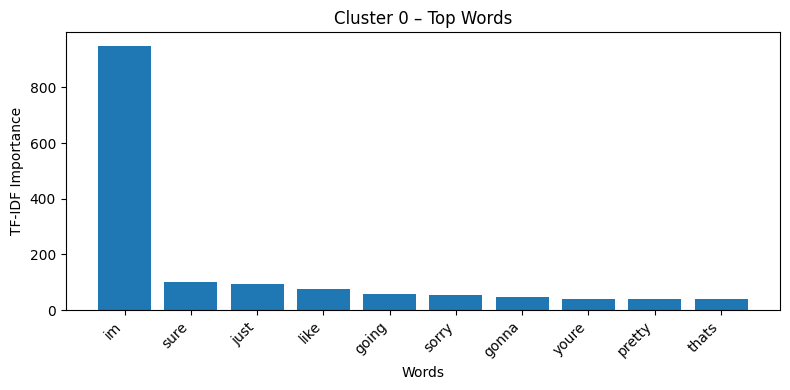


Cluster 1:
Top words: ['like', 'just', 'love', 'good', 'time', 'thats', 'did', 'think', 'got', 'look']


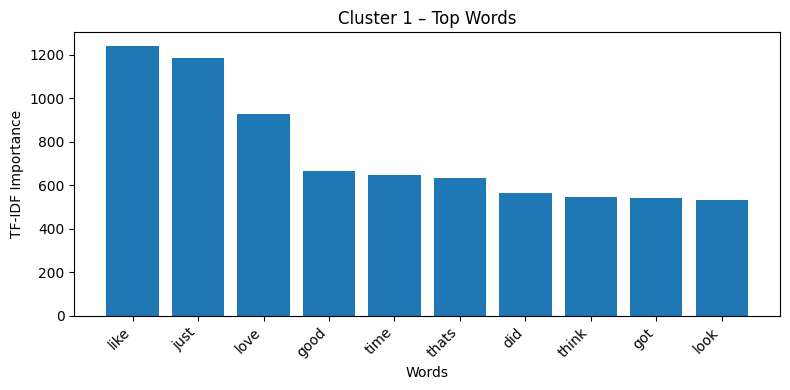


Cluster 2:
Top words: ['dont', 'know', 'think', 'just', 'like', 'need', 'make', 'want', 'time', 'good']


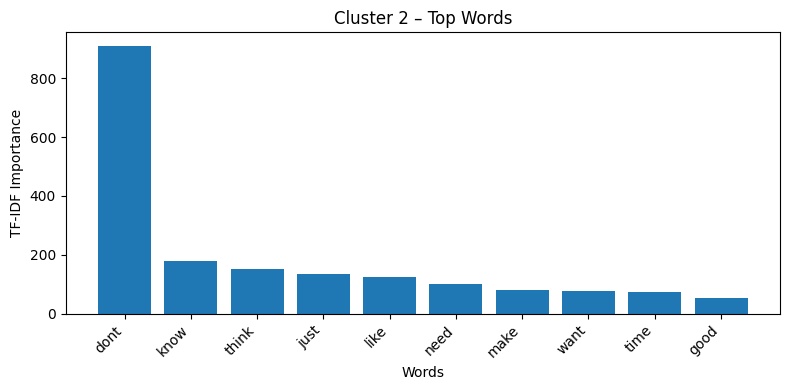


Cluster 3:
Top words: ['people', 'like', 'just', 'dont', 'think', 'know', 'thats', 'really', 'im', 'want']


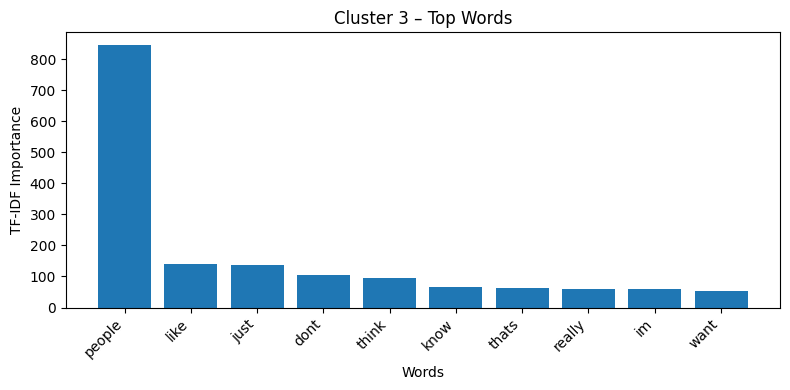


Cluster 4:
Top words: ['thank', 'dank', 'comment', 'downvote', 'meme', 'karma', 'rmarket76', 'awarded', 'user', 'moderators']


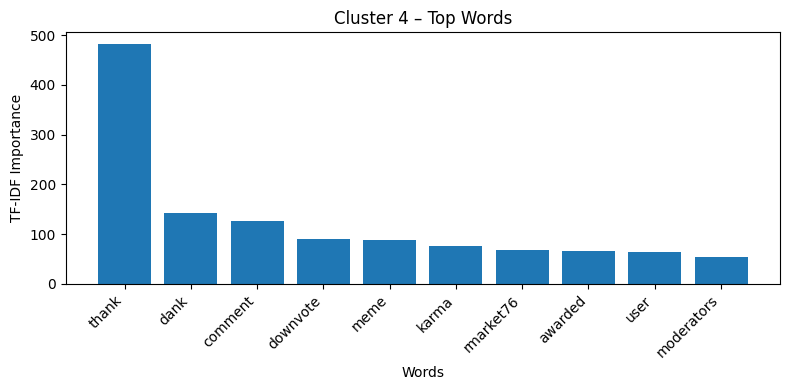

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(num_clusters):
    print(f"\nCluster {i}:")

  
    cluster_indices = df_sample[df_sample['cluster'] == i].index

    # Sum TF-IDF vectors for cluster
    cluster_vector_sum = X[cluster_indices].sum(axis=0)

    # Finding top 10 words
    top_word_indices = np.array(cluster_vector_sum).ravel().argsort()[-10:][::-1]
    top_words = [feature_names[idx] for idx in top_word_indices]
    top_scores = [cluster_vector_sum[0, idx] for idx in top_word_indices]

    # Print top words
    print("Top words:", top_words)

    #  GRAPH 
    plt.figure(figsize=(8,4))
    plt.bar(top_words, top_scores)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Cluster {i} – Top Words")
    plt.xlabel("Words")
    plt.ylabel("TF-IDF Importance")
    plt.tight_layout()
    plt.show()



=== Cluster 0 ===
- most of vrs uses are in the home not at an arcade youre not going to an arcade to work in a virtual office or watch netflix play board games attend a concert or visit your distant family and theres only one wearable peripheral here other than the headset gloves full body tracking is done by cameras
Top words: ['board', 'visit', 'uses', 'office', 'body', 'youve', 'youtube', 'younger', 'young', 'youd']
Source distribution: {'reddit': 1}


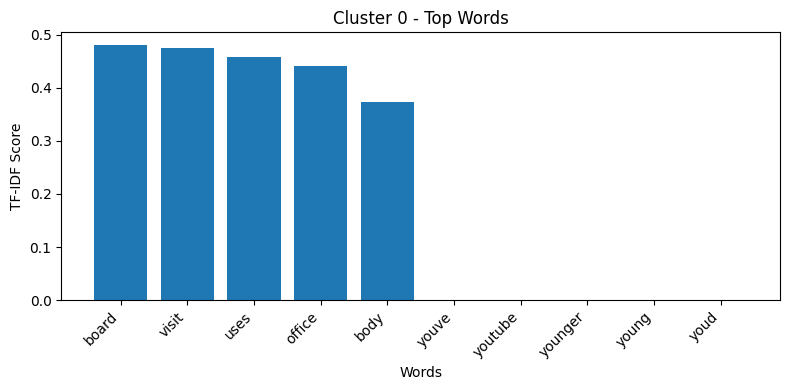


=== Cluster 1 ===
- yea itll be fuel for your mind itll keep you from getting ravenous while your mind gets fucked from the iv crush and your everlasting disappointment as your calls expire worthless over and over again while you hopelessly chase losses yoloing every last penny you have left to yolo
- oh boy i can already tell that my opinion is unpopular looks like i did a good job
- cutie
- traderkarmacake daysubmission karma um1llw4rd 7005202018 11 months ago53 424 ps4 ign set your ign here urlcomingsoonreddit 70no outside bidsoffers reposts of active bidsoffer posts are allowed once every 2 hours highest bid must be included as a link youre expected to honor bidsoffers this info does not guarantee a safe swap happy tradingposts 53 comments 424 market76 bot by verbalstuntman about this box set your ign here market 76 wiki join the discord message the mods here
- yes that what i think too but it made the decision even worse because instead of realease a another new legend that could

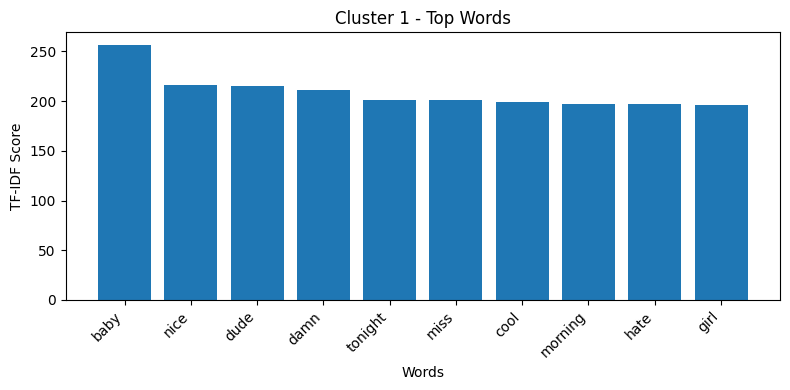


=== Cluster 2 ===
- my candle just dropped this candle is inspired by one of my favorite scents crystal gardenia i love how this scent illuminates the room makes me feel so calm shop the candle individually or in a bundle wthe matching fragrance now at kkwfragrancecom
- im aware of the bizarre rape isnt about sex party line its stupid and wrong
- on our way to birthday party
- bored girl at the holiday party
- ok fair point i just think that the socialist party would benefit from a fresh face but thats a goor point
Top words: ['favorite', 'party', 'christmas', 'pics', 'wearing', 'moments', 'collection', 'song', 'character', 'cover']
Source distribution: {'instagram': 270, 'reddit': 184}


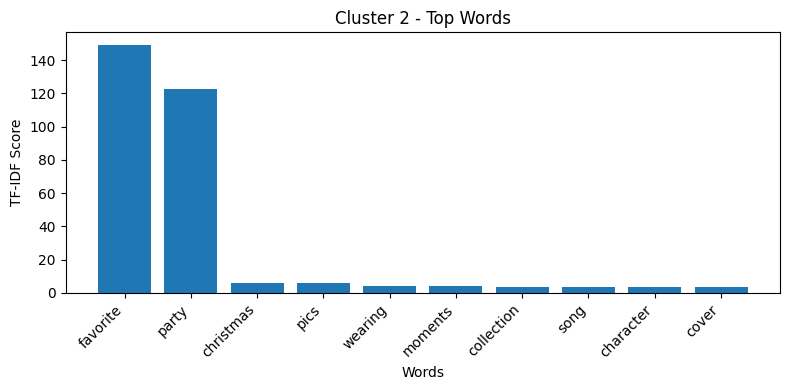


=== Cluster 3 ===
- excitingly beautiful i am ready
- beautiful day outside my friend
- the luckiest girl in the world so grateful met the most beautiful people in this country its so special here
- i know im a little late but happy birthday to my girl we had the best time in vegas celebrating your birthday after seeing your show i started my diet again lol ive never met anyone who ages backwards so beautiful inside out forever my inspiration
- thank you anna for beautiful evening
Top words: ['beautiful', 'pussy', 'sister', 'tonight', 'girl', 'tits', 'ass', 'body', 'morning', 'congrats']
Source distribution: {'instagram': 151, 'reddit': 136}


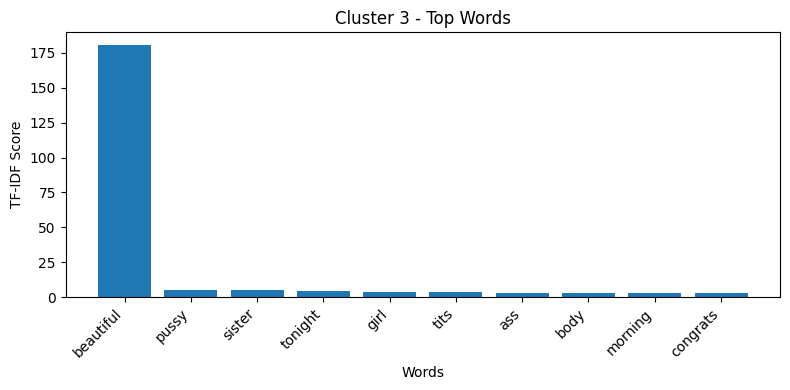


=== Cluster 4 ===
- she should fuck arya haha
- haha yes fuck anyone that thinks differently you sound like youre in a cult
- haha now its your problem giants settle in for a year of this
- furiously types to teammates haha i won without you fuckers
- thanks for all the comments supportive otherwise this wasnt a big deal kind of situation i just wondered how people dealt with it seems heavily tattooed people are waaaay more judgy about what ive gotten versus the reactions haha i appreciate all feedback again thanks
Top words: ['haha', 'totally', 'funny', 'deal', 'lets', 'barr', 'win', 'ball', 'wtf', 'joke']
Source distribution: {'reddit': 166, 'instagram': 32}


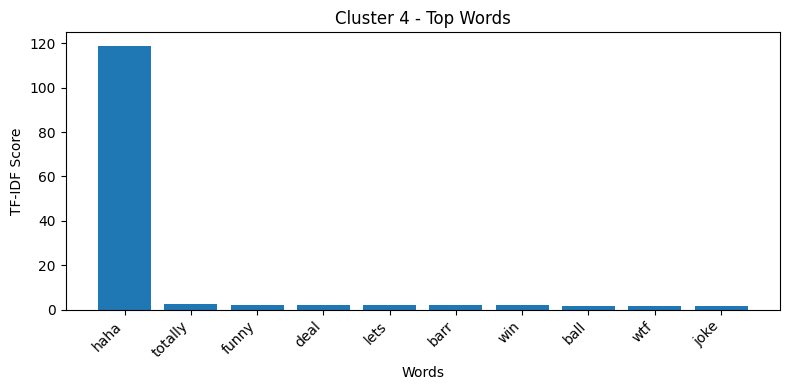

In [ ]:
#Handles cases where a cluster may have fewer posts 
#  K-means CLUSTERING improved
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

num_clusters = 5
num_sample_texts = 5
num_top_words = 10


kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(X)

feature_names = vectorizer.get_feature_names_out()

for i in range(num_clusters):
    print(f"\n=== Cluster {i} ===")

   
    
    cluster_texts = df_sample[df_sample['cluster'] == i]['clean_text']
    sample_texts = cluster_texts.sample(
        n=min(num_sample_texts, len(cluster_texts)),
        random_state=42
    ).tolist()
    for text in sample_texts:
        print("-", text)

    
    # TOP WORDS
  
    cluster_indices = df_sample[df_sample['cluster'] == i].index
    cluster_vector_sum = X[cluster_indices].sum(axis=0)

    if hasattr(cluster_vector_sum, "A"):
        cluster_vector_sum = cluster_vector_sum.A  # convert sparse → dense

    top_word_indices = np.argsort(cluster_vector_sum[0])[::-1][:num_top_words]
    top_words = [feature_names[idx] for idx in top_word_indices]
    top_scores = [cluster_vector_sum[0][idx] for idx in top_word_indices]

    print("Top words:", top_words)

    
    
    source_counts = df_sample[df_sample['cluster'] == i]['source'].value_counts()
    print("Source distribution:", source_counts.to_dict())

    # GRAPH TOP WORDS
 
    plt.figure(figsize=(8, 4))
    plt.bar(top_words, top_scores)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Cluster {i} - Top Words")
    plt.xlabel("Words")
    plt.ylabel("TF-IDF Score")
    plt.tight_layout()

 
    plt.savefig(f"cluster_{i}_top_words.png", dpi=300, bbox_inches='tight')

   
    
    plt.show()

In [ ]:

#n-grams in TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=3000,
    stop_words='english',
    ngram_range=(1, 3)   # unigrams + bigrams + trigrams
)

X = vectorizer.fit_transform(df_sample['clean_text'])
feature_names = vectorizer.get_feature_names_out()

print("TF-IDF Shape with n-grams:", X.shape)


TF-IDF Shape with n-grams: (67100, 3000)



Cluster 0:
Top words: ['im', 'sure', 'just', 'im sure', 'like', 'going', 'im just', 'sorry', 'im going', 'im sorry']


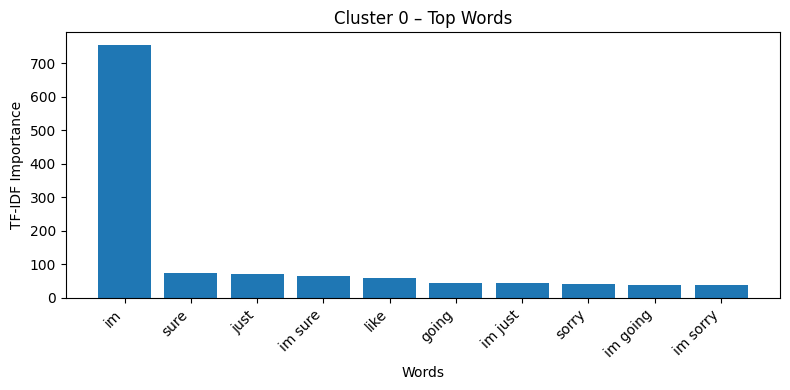


Cluster 1:
Top words: ['like', 'just', 'love', 'good', 'time', 'thats', 'did', 'think', 'got', 'look']


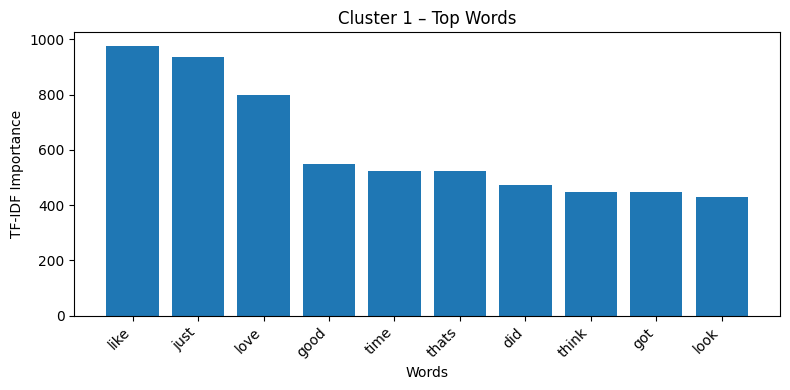


Cluster 2:
Top words: ['dont', 'know', 'dont know', 'think', 'dont think', 'just', 'like', 'need', 'want', 'make']


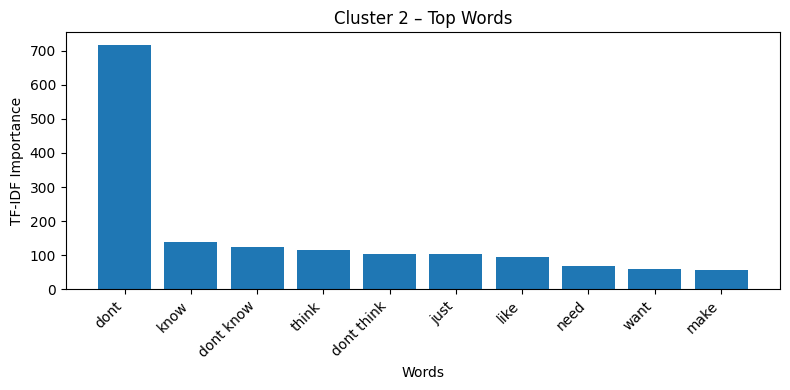


Cluster 3:
Top words: ['people', 'like', 'just', 'dont', 'think', 'know', 'thats', 'really', 'im', 'way']


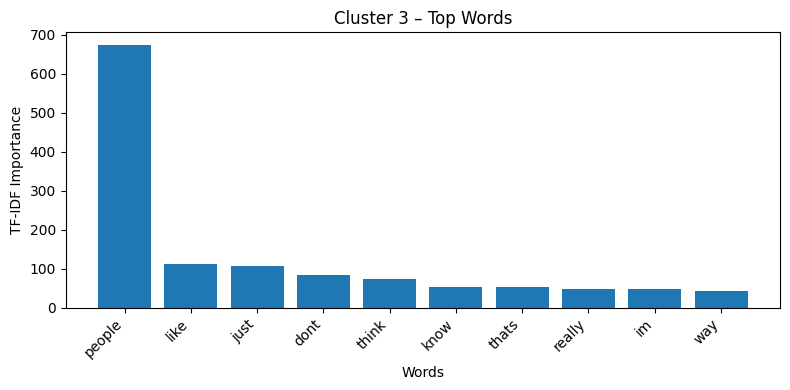


Cluster 4:
Top words: ['thank', 'dank', 'comment', 'dank meme', 'downvote comment', 'karma', 'downvote', 'meme', 'awarded karma', 'awarded karma user']


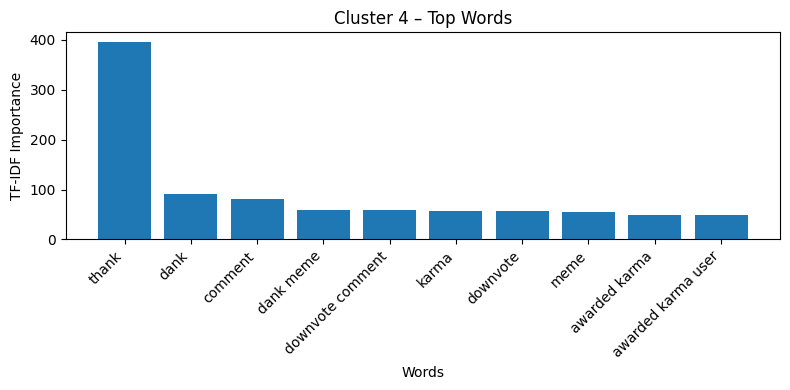

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

for i in range(num_clusters):
    print(f"\nCluster {i}:")

    # Get indices belonging to this cluster
    cluster_indices = df_sample[df_sample['cluster'] == i].index

    # Sum TF-IDF vectors for cluster
    cluster_vector_sum = X[cluster_indices].sum(axis=0)

    # Finding top 10 words
    top_word_indices = np.array(cluster_vector_sum).ravel().argsort()[-10:][::-1]
    top_words = [feature_names[idx] for idx in top_word_indices]
    top_scores = [cluster_vector_sum[0, idx] for idx in top_word_indices]

    # Print top words
    print("Top words:", top_words)

    #GRAPH 
    plt.figure(figsize=(8,4))
    plt.bar(top_words, top_scores)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Cluster {i} – Top Words")
    plt.xlabel("Words")
    plt.ylabel("TF-IDF Importance")
    plt.tight_layout()
    plt.show()

Final TF-IDF Shape: (67100, 2000)

Cluster 0:
Top words: ['board', 'visit', 'uses', 'office', 'body', 'youve', 'youtube', 'younger', 'young', 'youd']


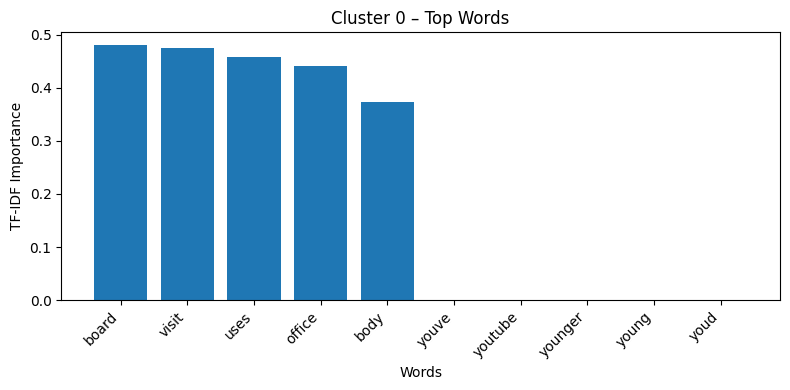


Cluster 1:
Top words: ['baby', 'nice', 'dude', 'damn', 'miss', 'tonight', 'cool', 'hate', 'morning', 'girl']


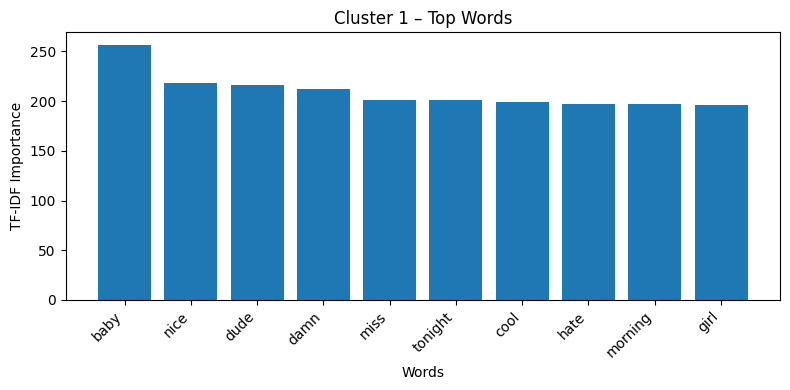


Cluster 2:
Top words: ['favorite', 'party', 'christmas', 'pics', 'wearing', 'moments', 'collection', 'song', 'character', 'cover']


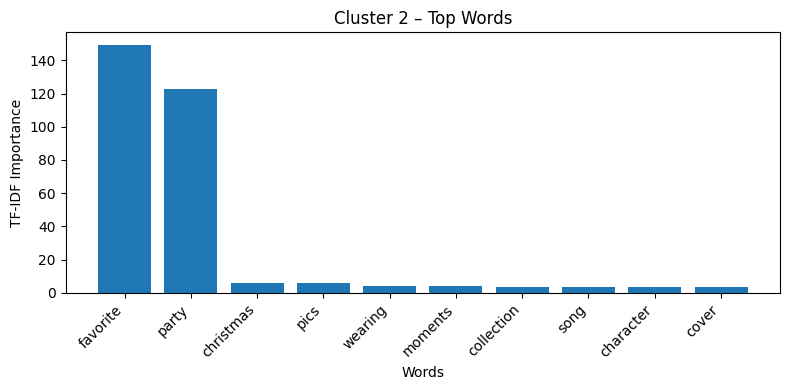


Cluster 3:
Top words: ['beautiful', 'sister', 'tonight', 'girl', 'body', 'wish', 'wow', 'morning', 'congrats', 'absolutely']


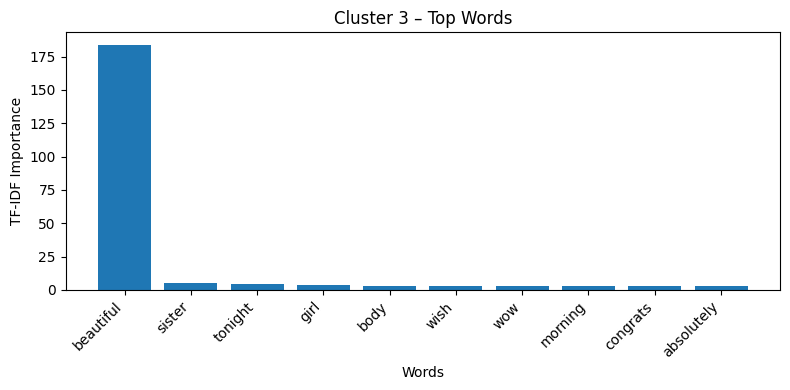


Cluster 4:
Top words: ['haha', 'funny', 'totally', 'deal', 'lets', 'barr', 'win', 'wtf', 'joke', 'yea']


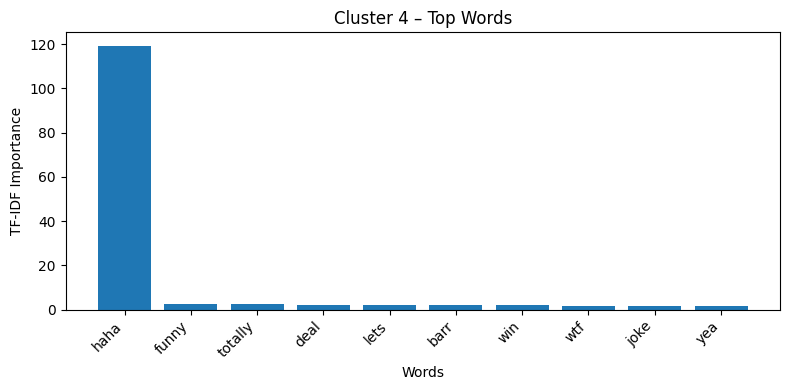


All cluster images saved successfully!


In [ ]:

# TF-IDF improved with Custom Stopwords and common-word Filtering

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt

extra_stopwords = {
    'im','lol','omg','gonna','pussy','gotta','ball','boobs','yeah','dont','ass','didnt','doesnt','wanna',
    'like','tits','just','pp','really','rt','amp','https','http','www','u','ur','r'
}


def remove_extra_stopwords(text):
    return " ".join([w for w in text.split() if w not in extra_stopwords])

df_sample['clean_text2'] = df_sample['clean_text'].apply(remove_extra_stopwords)


global_counts = Counter(" ".join(df_sample['clean_text2']).split())
COMMON_THRESHOLD = 500  

common_words = {w for w, c in global_counts.items() if c > COMMON_THRESHOLD}

def remove_common_words(text):

    return " ".join([w for w in text.split() if w not in common_words])

df_sample['clean_text2'] = df_sample['clean_text2'].apply(remove_common_words)

# TF-IDF VECTORIZE
vectorizer = TfidfVectorizer(
    max_features=2000,
    stop_words='english'
)

X = vectorizer.fit_transform(df_sample['clean_text2'])
feature_names = vectorizer.get_feature_names_out()
print("Final TF-IDF Shape:", X.shape)


for i in range(num_clusters):
    print(f"\nCluster {i}:")

    cluster_indices = df_sample[df_sample['cluster'] == i].index
    cluster_vector_sum = X[cluster_indices].sum(axis=0)

    top_word_indices = np.array(cluster_vector_sum).ravel().argsort()[-10:][::-1]
    top_words = [feature_names[idx] for idx in top_word_indices]
    top_scores = [cluster_vector_sum[0, idx] for idx in top_word_indices]

    print("Top words:", top_words)

    
    plt.figure(figsize=(8, 4))
    plt.bar(top_words, top_scores)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Cluster {i} – Top Words")
    plt.xlabel("Words")
    plt.ylabel("TF-IDF Importance")
    plt.tight_layout()

    
    plt.savefig(f"cluster_{i}_top_words.png", dpi=300, bbox_inches='tight')

    plt.show()

print("\nAll cluster images saved successfully!")

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


labels = df_sample['cluster'].values
n_clusters = len(set(labels))
print(f"Number of clusters: {n_clusters}")


if n_clusters > 1:
    sil_score = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X.toarray(), labels)  # convert sparse to dense for CH
    db_score = davies_bouldin_score(X.toarray(), labels)

    print("\n--- Clustering Metrics ---")
    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"Calinski-Harabasz Index: {ch_score:.4f}")
    print(f"Davies-Bouldin Index: {db_score:.4f}")
else:
    print("Metrics cannot be computed: only 1 cluster present.")


Number of clusters: 5

--- Clustering Metrics ---
Silhouette Score: 0.0858
Calinski-Harabasz Index: 85.9988
Davies-Bouldin Index: 2.7606


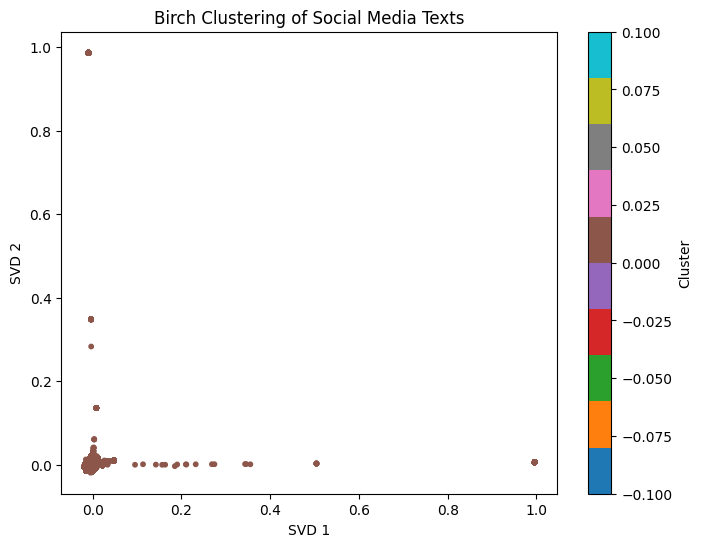


Cluster 0

Sample Posts:
- nan
- chemistry puns
- asylum asylum canadian asylum persecuted asylum sustain tolerate illiterates countrymen
- nan
- tread lightly

Top Words: ['failures', 'subpoena', 'aimed', 'spoiling', 'ingame', 'spring', 'cm', 'genres', 'outlets', 'rim']
Total posts in this cluster: 1017100


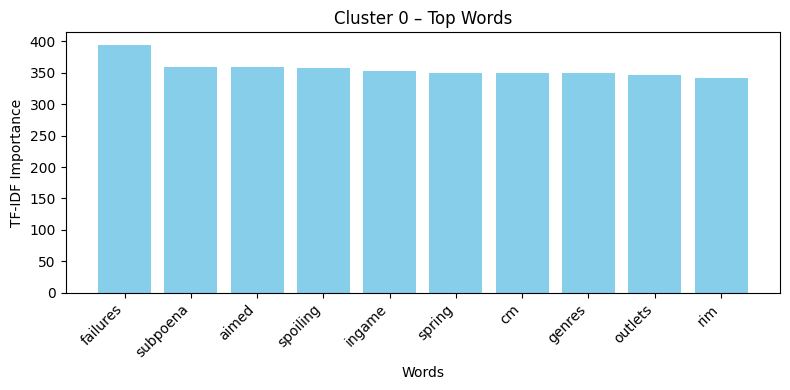

In [ ]:
#Birch Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.decomposition import TruncatedSVD


df = pd.read_csv("clustered_data.csv")
X_reduced = np.load("X_reduced.npy")
vectorizer = joblib.load("tfidf.pkl")
X = joblib.load("tfidf_matrix.pkl")  # sparse TF-IDF matrix


# 2D Visualization of clusters

svd_2d = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd_2d.fit_transform(X_reduced)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=df['cluster'], cmap='tab10', s=10)
plt.title("Birch Clustering of Social Media Texts")
plt.xlabel("SVD 1")
plt.ylabel("SVD 2")
plt.colorbar(scatter, label='Cluster')
plt.show()


# Top words per cluster

feature_names = vectorizer.get_feature_names_out()

for c in sorted(df['cluster'].unique()):
    print("\n============================")
    print(f"Cluster {c}")
    print("============================")

    cluster_df = df[df['cluster'] == c]

    
    print("\nSample Posts:")
    samples = cluster_df["clean_text"].sample(min(5, len(cluster_df)), random_state=42)
    for text in samples:
        print("-", text)

    # Top words based on TF-IDF
    cluster_idx = cluster_df.index
    cluster_vec_sum = X[cluster_idx].sum(axis=0).A1
    top_idx = cluster_vec_sum.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_idx]
    top_scores = cluster_vec_sum[top_idx]

    print("\nTop Words:", top_words)
    print(f"Total posts in this cluster: {len(cluster_df)}")

    
    plt.figure(figsize=(8, 4))
    plt.bar(top_words, top_scores, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Cluster {c} – Top Words")
    plt.xlabel("Words")
    plt.ylabel("TF-IDF Importance")
    plt.tight_layout()
    plt.show()




Cluster 0

Sample Posts:
- 
- chemistry puns
- asylum asylum canadian asylum persecuted asylum sustain tolerate illiterates countrymen
- 
- tread lightly

Top Words: ['farther', 'booking', 'stupidly', 'aiming', 'spite', 'insight', 'spotlight', 'powell', 'gladly', 'cod']
Total posts in this cluster: 1017100


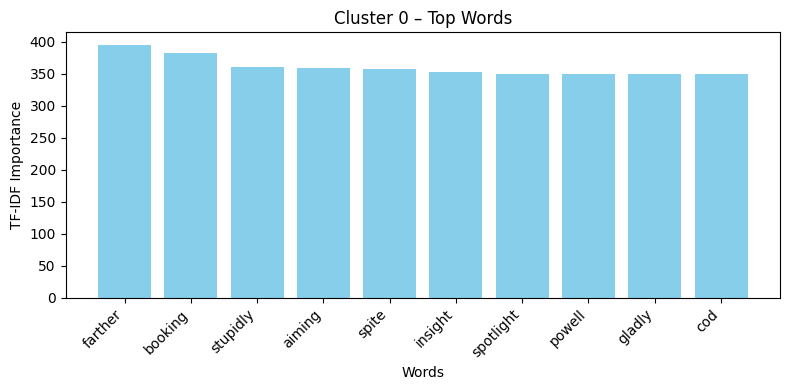

In [ ]:
#Birch Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.decomposition import TruncatedSVD


# Load clustered data

df = pd.read_csv("clustered_data.csv")

# CLEAN TEXT: STOPWORDS + COMMON WORDS + OFFENSIVE WORDS

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

# Extra social media stopwords
extra_stopwords = {
    'im','lol','omg','gonna','gotta','yeah','dont','didnt','doesnt','wanna',
    'like','just','really','rt','amp','https','http','www','u','ur','r'
}


# Combine all stopwords
all_stopwords = ENGLISH_STOP_WORDS.union(extra_stopwords).union(offensive_words)


def clean_text(text):
    return " ".join([w for w in text.lower().split() if w not in all_stopwords])

df['clean_text'] = df['clean_text'].fillna('').apply(clean_text)

# Removing  noise
global_counts = Counter(" ".join(df['clean_text']).split())
COMMON_THRESHOLD = 500  
common_words = {w for w, c in global_counts.items() if c > COMMON_THRESHOLD}

def remove_common_words(text):
    return " ".join([w for w in text.split() if w not in common_words])

df['clean_text'] = df['clean_text'].apply(remove_common_words)

X_reduced = np.load("X_reduced.npy")
vectorizer = joblib.load("tfidf.pkl")
X = joblib.load("tfidf_matrix.pkl")  # sparse TF-IDF matrix



# Top words per cluster

feature_names = vectorizer.get_feature_names_out()

for c in sorted(df['cluster'].unique()):
    print("\n============================")
    print(f"Cluster {c}")
    print("============================")

    cluster_df = df[df['cluster'] == c]

    
    print("\nSample Posts:")
    samples = cluster_df["clean_text"].sample(min(5, len(cluster_df)), random_state=42)
    for text in samples:
        print("-", text)

    # Top words based on TF-IDF
    cluster_idx = cluster_df.index
    cluster_vec_sum = X[cluster_idx].sum(axis=0).A1
    top_idx = cluster_vec_sum.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_idx]
    top_scores = cluster_vec_sum[top_idx]

    print("\nTop Words:", top_words)
    print(f"Total posts in this cluster: {len(cluster_df)}")

    
    plt.figure(figsize=(8, 4))
    plt.bar(top_words, top_scores, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Cluster {c} – Top Words")
    plt.xlabel("Words")
    plt.ylabel("TF-IDF Importance")
    plt.tight_layout()
    plt.show()

Number of clusters (train): 5
Number of clusters (val): 5
Number of clusters (test): 5


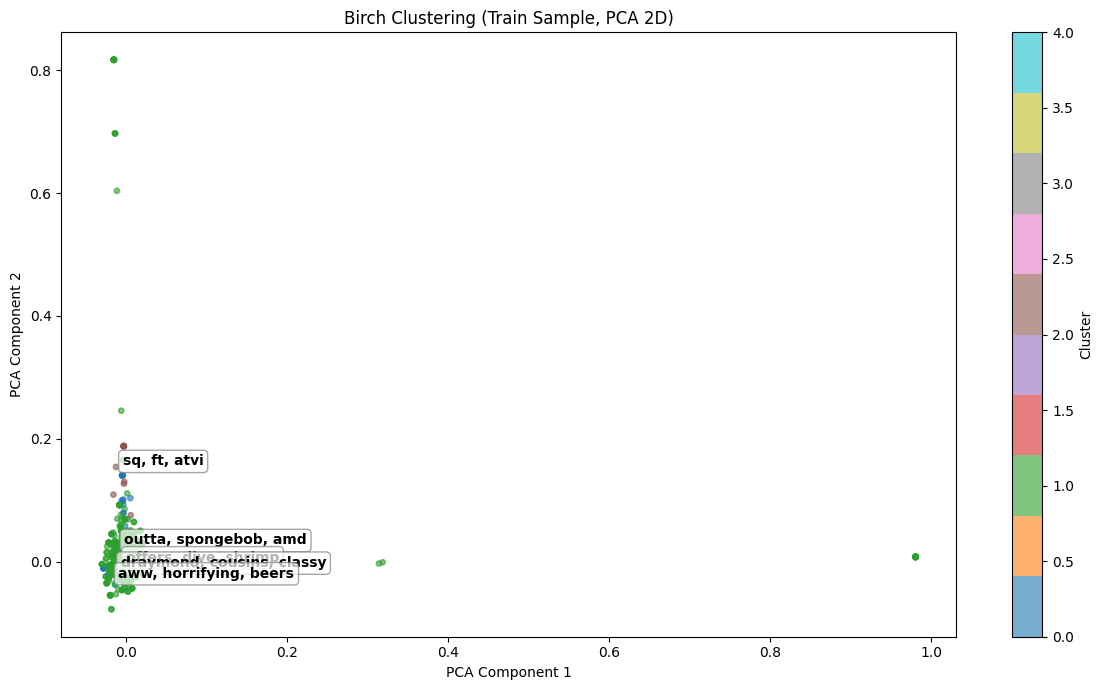

In [ ]:
#TF-IDF Vectorization , Birch clustering ,Dimensionality Reduction (SVD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import Birch
from sklearn.model_selection import train_test_split
from collections import Counter




df = pd.read_csv("../dataset/combined_cleaned_social_media.csv")
df['clean_text'] = df['clean_text'].fillna('')

extra_stopwords = {
    'im','gonna','ahh','gotta','ball','yeah','dont','didnt','doesnt','wanna',
    'like','tits','just','really','amp','http','www','u','ur','r'
}

offensive_words = {'ass','pp','rt','pussy','boobs','dic'}
all_stopwords = ENGLISH_STOP_WORDS.union(extra_stopwords).union(offensive_words)

def clean_text(text):
    return " ".join([w for w in text.lower().split() if w not in all_stopwords])

df['clean_text'] = df['clean_text'].apply(clean_text)

# Removing very common words
global_counts = Counter(" ".join(df['clean_text']).split())
COMMON_THRESHOLD = 500
common_words = {w for w, c in global_counts.items() if c > COMMON_THRESHOLD}

def remove_common_words(text):
    return " ".join([w for w in text.split() if w not in common_words])

df['clean_text'] = df['clean_text'].apply(remove_common_words)


# Train / Test / Validation split

X_text = df['clean_text'].values
X_train_text, X_temp_text = train_test_split(X_text, test_size=0.4, random_state=42)
X_val_text, X_test_text = train_test_split(X_temp_text, test_size=0.5, random_state=42)


# TF-IDF vectorization

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(X_train_text)
X_val = vectorizer.transform(X_val_text)
X_test = vectorizer.transform(X_test_text)

# Save vectorizer
joblib.dump(vectorizer, "tfidf.pkl")


# SVD dimensionality reduction

svd = TruncatedSVD(n_components=50, random_state=42)
X_train_reduced = svd.fit_transform(X_train)
X_val_reduced = svd.transform(X_val)
X_test_reduced = svd.transform(X_test)

joblib.dump(svd, "svd50.pkl")


# Birch clustering

birch_model = Birch(n_clusters=5, threshold=0.05)
train_labels = birch_model.fit_predict(X_train_reduced)
val_labels = birch_model.predict(X_val_reduced)
test_labels = birch_model.predict(X_test_reduced)

print(f"Number of clusters (train): {len(set(train_labels))}")
print(f"Number of clusters (val): {len(set(val_labels))}")
print(f"Number of clusters (test): {len(set(test_labels))}")


# Add clusters to DataFrames

df_train = pd.DataFrame({'text': X_train_text, 'cluster': train_labels})
df_val = pd.DataFrame({'text': X_val_text, 'cluster': val_labels})
df_test = pd.DataFrame({'text': X_test_text, 'cluster': test_labels})


#  Visualization 

sample_size = min(20000, X_train_reduced.shape[0])
sample_idx = np.random.choice(X_train_reduced.shape[0], size=sample_size, replace=False)
X_sample = X_train_reduced[sample_idx]
labels_sample = train_labels[sample_idx]

# Reduce to 2D
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_sample)

plt.figure(figsize=(12,7))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_sample, cmap='tab10', s=15, alpha=0.6)
plt.title("Birch Clustering (Train Sample, PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')

feature_names = vectorizer.get_feature_names_out()

for c in sorted(set(train_labels)):
    cluster_idx = np.where(labels_sample == c)[0]
    if len(cluster_idx) == 0:
        continue
    
    # Sum TF-IDF vectors of cluster members (sample)
    cluster_vec_sum = X_train[sample_idx][cluster_idx].sum(axis=0).A1
    top_words_idx = cluster_vec_sum.argsort()[-3:][::-1]  # top 3 words
    top_words = [feature_names[i] for i in top_words_idx]
    
    # Position of the annotation (cluster center in 2D)
    x_center = X_2d[cluster_idx, 0].mean()
    y_center = X_2d[cluster_idx, 1].mean()
    
    # Annotate top words
    plt.text(
        x_center, y_center, ", ".join(top_words),
        fontsize=10, fontweight='bold',
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round')
    )

plt.tight_layout()
plt.show()



In [67]:
import pandas as pd
df = pd.read_csv("clustered_data.csv")
print(df.columns)

Index(['text', 'source', 'clean_text', 'cluster'], dtype='object')


In [ ]:
def clean_text_data(df, text_column='clean_text'):
   
    # copy to avoid modifying original
    df_clean = df.copy()
    
    print(" CLEANING TEXT DATA...")
    original_shape = df_clean.shape
    
    # Checking if column exists
    if text_column not in df_clean.columns:
        raise ValueError(f"Column '{text_column}' not found in dataset. Available columns: {list(df_clean.columns)}")
    
    # Converting to string (handles mixed types)
    df_clean[text_column] = df_clean[text_column].astype(str)
    
    #  Handle NaN values
    df_clean[text_column] = df_clean[text_column].replace('nan', '')
    
    #  Removing empty strings and whitespace-only strings
    df_clean = df_clean[df_clean[text_column].str.strip() != '']
    
   
    df_clean = df_clean[df_clean[text_column].str.len() >= 10]
    
    print(f" Cleaning complete:")
    print(f"   - Removed {original_shape[0] - df_clean.shape[0]} rows")
    print(f"   - Final dataset: {df_clean.shape}")
    
    return df_clean


df_sample_clean = clean_text_data(df_sample, 'clean_text')
import os
import pandas as pd

def save_under_25mb(df, filename_base="df_sample_clean", keep_columns=None):

    MAX_SIZE_MB = 25
    df_to_save = df.copy()
    
   
    if keep_columns:
        df_to_save = df_to_save[keep_columns]
    
   
    parquet_file = f"{filename_base}.parquet"
    df_to_save.to_parquet(parquet_file, index=False, compression='snappy')
    size_mb = os.path.getsize(parquet_file) / 1e6
    print(f"Saved as Parquet: {size_mb:.2f} MB")
    
    if size_mb <= MAX_SIZE_MB:
        print(" File under 25MB, done.")
        return parquet_file
    
    print(" Parquet exceeds 25MB, trying compressed CSV...")
    
    
    csv_file = f"{filename_base}.csv.gz"
    df_to_save.to_csv(csv_file, index=False, compression='gzip')
    size_mb = os.path.getsize(csv_file) / 1e6
    print(f"Saved as CSV (gzip): {size_mb:.2f} MB")
    
    if size_mb <= MAX_SIZE_MB:
        print(" File under 25MB, done.")
        return csv_file
    
    print(" CSV still too large. Dropping optional columns to reduce size...")
    
    # Droping all except first 2 columns 
    columns_to_keep = df_to_save.columns[:2]
    df_small = df_to_save[columns_to_keep]
    csv_small_file = f"{filename_base}_small.csv.gz"
    df_small.to_csv(csv_small_file, index=False, compression='gzip')
    size_mb = os.path.getsize(csv_small_file) / 1e6
    print(f"Saved reduced CSV (gzip): {size_mb:.2f} MB")
    
    if size_mb <= MAX_SIZE_MB:
        print("File under 25MB, done.")
        return csv_small_file
    else:
        raise ValueError("Cannot reduce file under 25MB automatically. Consider further filtering or sampling.")


saved_file = save_under_25mb(df_sample_clean, filename_base="Re_cleaned", keep_columns=['clean_text', 'source'])
print("Saved file:", saved_file)


 CLEANING TEXT DATA...
 Cleaning complete:
   - Removed 5381 rows
   - Final dataset: (61719, 5)
Saved as Parquet: 5.31 MB
 File under 25MB, done.
Saved file: Re_cleaned.parquet


In [ ]:
def robust_clustering_pipeline(df, text_column='clean_text', num_clusters=5):
    """
    Robust clustering pipeline that handles data cleaning and validation
    """
    print(" STARTING CLUSTERING PIPELINE")
    print("=" * 50)
    
    # Data validation
    print(f"1. Original data shape: {df.shape}")
    if text_column not in df.columns:
        raise ValueError(f"Text column '{text_column}' not found. Available: {list(df.columns)}")
    
    # Data cleaning
    df_clean = df.copy()
    df_clean[text_column] = df_clean[text_column].fillna('').astype(str)
    df_clean = df_clean[df_clean[text_column].str.strip() != '']
    
    print(f"2. After cleaning: {df_clean.shape}")
    print(f"   Removed {len(df) - len(df_clean)} invalid rows")
    
    if len(df_clean) == 0:
        raise ValueError("No valid text documents after cleaning!")
    
    # Vectorization
    vectorizer = TfidfVectorizer(
        max_features=5000, #cng inc 1k to 5k
        stop_words='english',
        min_df=2,
        max_df=0.9, #cng inc from .8 to .9
        ngram_range=(1, 2)  # Capture bigrams
    )
    
    X = vectorizer.fit_transform(df_clean[text_column])
    print(f"3. TF-IDF matrix shape: {X.shape}")
    
    #  optimal cluster count 
    if num_clusters == 'auto':
        num_clusters = find_optimal_clusters(X)
    
    # Clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    df_clean['cluster'] = cluster_labels
    
    # Evaluation
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"4. Clustering metrics:")
    print(f"   - Silhouette Score: {silhouette_avg:.3f}")
    print(f"   - Clusters: {num_clusters}")
    print(f"   - Cluster sizes: {pd.Series(cluster_labels).value_counts().to_dict()}")
    
    return df_clean, X, vectorizer, kmeans

def find_optimal_clusters(X, max_k=10):
    """Finding optimal number of clusters using silhouette score"""
    from sklearn.metrics import silhouette_score
    
    best_k = 5
    best_score = -1
    
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        
        if score > best_score:
            best_score = score
            best_k = k
    
    print(f"   Optimal clusters: {best_k} (silhouette: {best_score:.3f})")
    return best_k


df_clustered, X, vectorizer, kmeans = robust_clustering_pipeline(df_sample, 'clean_text', 5)

 STARTING CLUSTERING PIPELINE
1. Original data shape: (67100, 5)
2. After cleaning: (64683, 5)
   Removed 2417 invalid rows
3. TF-IDF matrix shape: (64683, 5000)
4. Clustering metrics:
   - Silhouette Score: 0.018
   - Clusters: 5
   - Cluster sizes: {1: 53939, 2: 4672, 0: 4199, 3: 1369, 4: 504}


In [22]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


 Checking available data...
df_sample shape: (67100, 5)
df_sample columns: ['text', 'source', 'clean_text', 'cluster', 'clean_text2']

 STARTING CLUSTERING PIPELINE

 EXECUTING CLUSTERING PIPELINE...
1. Data cleaning...
   Working with 64683 documents
2. Vectorization...
   TF-IDF matrix shape: (64683, 1000)
3. Clustering...
   Silhouette Score: 0.041
4. Finding top words per cluster...
   Cluster 0 (size: 3916): like, looks, look, just, sounds
   Cluster 1 (size: 1036): lol, just, im, like, dont
   Cluster 2 (size: 49503): love, good, time, thats, new
   Cluster 3 (size: 10228): just, im, dont, people, think
5. Creating visualization...
   Reducing dimensions using PCA...
   Creating plot...
   Displaying plot...


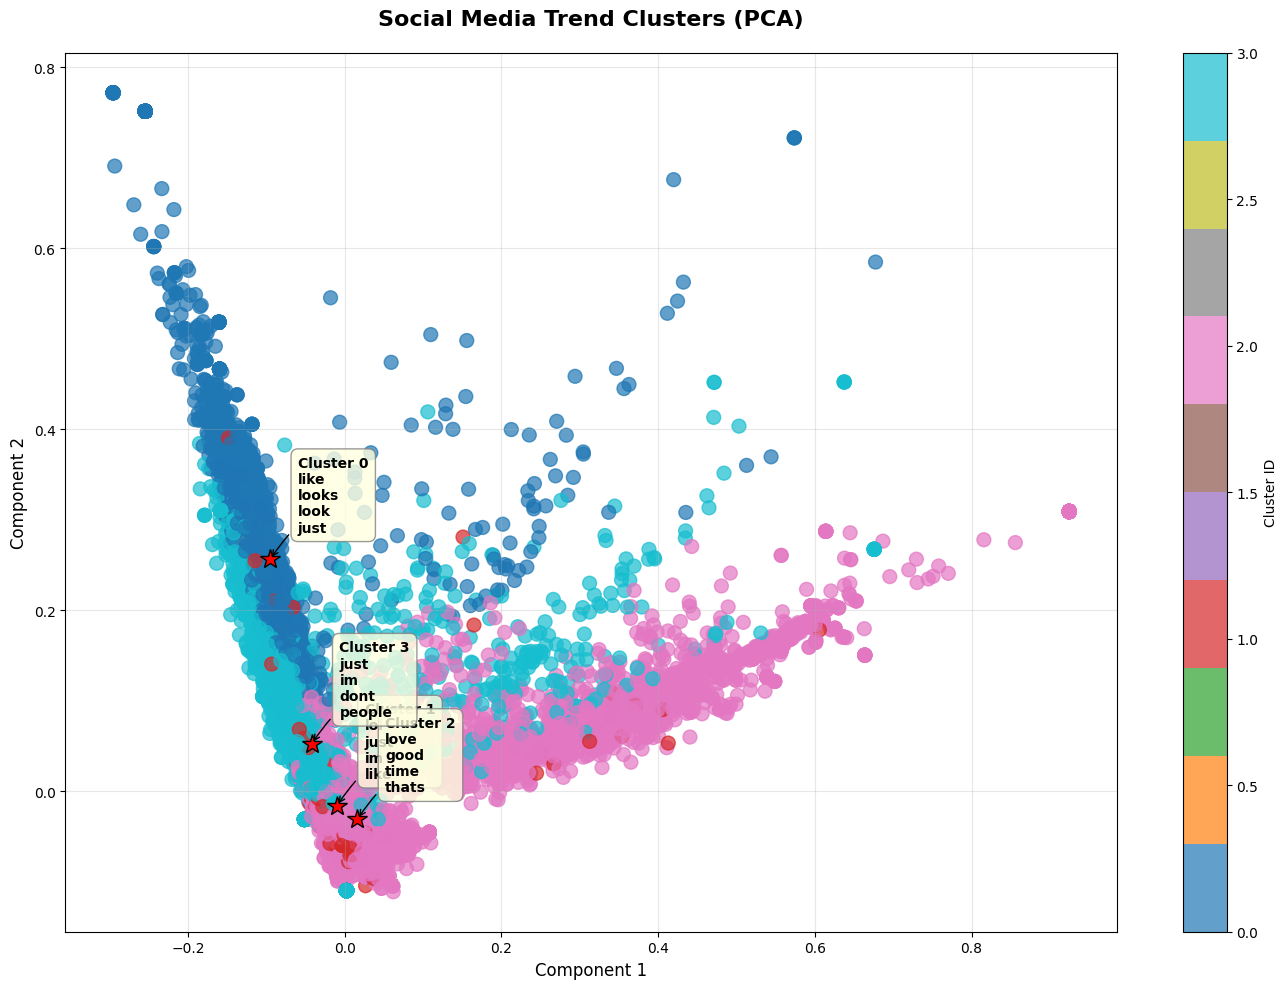

 Plot displayed successfully!

 CLUSTERING COMPLETED SUCCESSFULLY!
 Final clustered data shape: (64683, 5)
 Number of clusters: 4

 CLUSTER DISTRIBUTION:
   Cluster 0: 3916 posts (6.1%)
   Cluster 1: 1036 posts (1.6%)
   Cluster 2: 49503 posts (76.5%)
   Cluster 3: 10228 posts (15.8%)


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA





try:
    print(f"df_sample shape: {df_sample.shape}")
    print(f"df_sample columns: {df_sample.columns.tolist()}")
except NameError:
    print(" sample not found. Creating sample data...")
    
   
    sample_data = {
        'clean_text': [
            "just watched the new marvel movie it was absolutely amazing the special effects were incredible",
            "political debate tonight was intense both candidates had strong arguments about economic policy",
            "my new gaming setup is finally complete rgb lights everywhere and super fast processor",
            "cooking dinner tonight trying out a new recipe hope it turns out well with fresh ingredients",
            "sports game yesterday was unbelievable the underdog team won in the final seconds",
            "technology conference was inspiring learned so much about artificial intelligence and machine learning",
            "weather today is perfect for hiking sunny with a cool breeze in the mountains",
            "new smartphone release has amazing camera features and battery life is impressive",
            "stock market analysis shows interesting trends in tech sector investments growing",
            "music festival lineup announced so many great artists performing this summer",
            "video game release delayed again developers need more time for polishing gameplay",
            "electric vehicles are the future charging infrastructure expanding rapidly nationwide",
            "workout routine paying off feeling stronger and more energetic every day",
            "social media algorithms need more transparency users deserve to know how content is filtered",
            "space exploration news exciting developments in mars mission planning",
            "healthy eating tips vegetables and fruits should be part of every meal plan",
            "programming languages comparison python continues to grow in popularity for data science",
            "travel restrictions easing finally able to plan international vacations again",
            "climate change discussion important steps being taken for renewable energy adoption",
            "education technology tools helping students learn more effectively online"
        ],
        'subreddit': ['movies', 'politics', 'gaming', 'cooking', 'sports', 
                     'technology', 'outdoors', 'tech', 'investing', 'music',
                     'gaming', 'technology', 'fitness', 'technology', 'science',
                     'health', 'programming', 'travel', 'environment', 'education'],
        'score': [10, 5, 8, 3, 15, 7, 4, 9, 6, 12, 2, 8, 5, 4, 9, 3, 11, 7, 5, 6]
    }
    
    df_sample = pd.DataFrame(sample_data)
    print(" Created sample dataframe for testing")
    print(f"Sample data shape: {df_sample.shape}")

print("\n" + "="*50)
print(" STARTING CLUSTERING PIPELINE")
print("="*50)

def working_clustering_pipeline(df, text_column='clean_text', n_clusters=5):
    """
    Working clustering pipeline with guaranteed plotting
    """
    print("1. Data cleaning...")
    df_clean = df.dropna(subset=[text_column]).copy()
    df_clean[text_column] = df_clean[text_column].fillna('').astype(str)
    df_clean = df_clean[df_clean[text_column].str.strip() != '']
    
    print(f"   Working with {len(df_clean)} documents")
    
    if len(df_clean) == 0:
        raise ValueError("No valid text documents after cleaning!")
    
    print("2. Vectorization...")
    vectorizer = TfidfVectorizer(
        max_features=1000, 
        stop_words='english',
        min_df=1,
        max_df=0.8
    )
    X = vectorizer.fit_transform(df_clean[text_column])
    print(f"   TF-IDF matrix shape: {X.shape}")
    
    print("3. Clustering...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    df_clean['cluster'] = labels
    
    # silhouette score
    silhouette_avg = silhouette_score(X, labels)
    print(f"   Silhouette Score: {silhouette_avg:.3f}")
    
    print("4. Finding top words per cluster...")
    feature_names = vectorizer.get_feature_names_out()
    top_words_per_cluster = {}
    
    for i in range(n_clusters):
        cluster_mask = labels == i
        cluster_size = cluster_mask.sum()
        
        if cluster_size > 0:
            cluster_vectors = X[cluster_mask]
            word_scores = np.array(cluster_vectors.sum(axis=0)).flatten()
            top_indices = word_scores.argsort()[-10:][::-1]
            top_words_per_cluster[i] = [feature_names[idx] for idx in top_indices]
            
            print(f"   Cluster {i} (size: {cluster_size}): {', '.join(top_words_per_cluster[i][:5])}")
        else:
            top_words_per_cluster[i] = []
            print(f"   Cluster {i}: EMPTY")
    
    print("5. Creating visualization...")
    create_cluster_visualization(X, labels, top_words_per_cluster)
    
    return df_clean, X, vectorizer, kmeans, top_words_per_cluster

def create_cluster_visualization(X, labels, top_words, method='pca'):
    """Create and display cluster visualization"""
    print(f"   Reducing dimensions using {method.upper()}...")
    
    # Reducing dimensions
    if method == 'pca':
        reducer = PCA(n_components=2, random_state=42)
    else:
        from sklearn.manifold import TSNE
        reducer = TSNE(n_components=2, random_state=42, perplexity=min(30, X.shape[0]-1))
    
    X_2d = reducer.fit_transform(X.toarray())
    
    print("   Creating plot...")
   
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Scatter plot
    scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', alpha=0.7, s=100)
    
    #  cluster annotations
    for cluster_id in np.unique(labels):
        cluster_points = X_2d[labels == cluster_id]
        if len(cluster_points) > 0:
            center = cluster_points.mean(axis=0)
            
            #  annotation text (will show top 3-4 words)
            words_to_show = min(4, len(top_words[cluster_id]))
            words_text = "\n".join(top_words[cluster_id][:words_to_show])
            annotation_text = f"Cluster {cluster_id}\n{words_text}"
            
            ax.annotate(
                annotation_text, 
                xy=center, 
                xytext=(20, 20),
                textcoords='offset points',
                fontsize=10, 
                weight='bold',
                bbox=dict(
                    boxstyle='round,pad=0.5', 
                    facecolor='lightyellow', 
                    alpha=0.8,
                    edgecolor='gray'
                ),
                arrowprops=dict(
                    arrowstyle='->', 
                    color='black',
                    connectionstyle='arc3,rad=0.1'
                )
            )
            
            # Marking center with a star
            ax.plot(center[0], center[1], 'r*', markersize=15, markeredgecolor='black')
    
    ax.set_title(f'Social Media Trend Clusters ({method.upper()})', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel('Component 1', fontsize=12)
    ax.set_ylabel('Component 2', fontsize=12)
    plt.colorbar(scatter, ax=ax, label='Cluster ID')
    plt.grid(True, alpha=0.3)
    
    print("   Displaying plot...")
    plt.tight_layout()
    plt.show()
    
    print(" Plot displayed successfully!")


try:
    print("\n EXECUTING CLUSTERING PIPELINE...")
    df_clustered, X, vectorizer, kmeans, top_words = working_clustering_pipeline(df_sample, 'clean_text', 4)
    
    print("\n CLUSTERING COMPLETED SUCCESSFULLY!")
    print(f" Final clustered data shape: {df_clustered.shape}")
    print(f" Number of clusters: {len(np.unique(df_clustered['cluster']))}")
    
    
    print("\n CLUSTER DISTRIBUTION:")
    cluster_counts = df_clustered['cluster'].value_counts().sort_index()
    for cluster_id, count in cluster_counts.items():
        percentage = (count / len(df_clustered)) * 100
        print(f"   Cluster {cluster_id}: {count} posts ({percentage:.1f}%)")
        
except Exception as e:
    print(f"\n ERROR: {e}")
    print("\n TROUBLESHOOTING TIPS:")
    print("1. Check if matplotlib is properly installed")
    print("2. Try restarting your Jupyter kernel")
    print("3. Ensure you're running this in a Jupyter notebook")
    print("4. Check console for any warning messages")

Dataset ready: 989103 rows
Clusters (train): 5
Clusters (val): 5
Clusters (test): 5


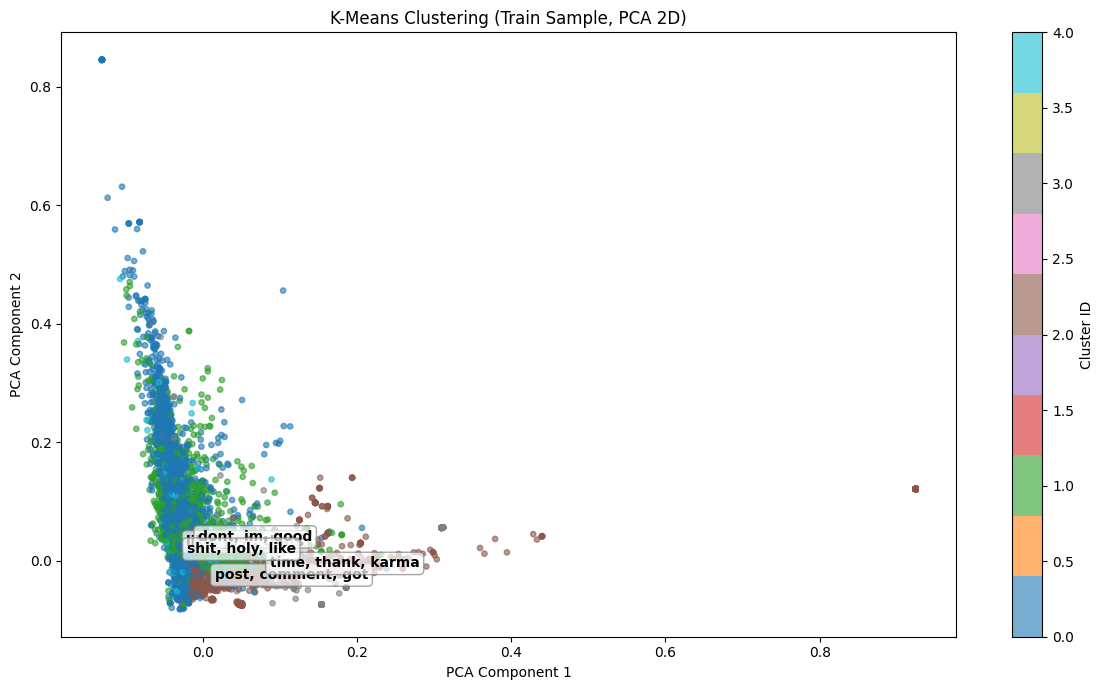

Clustered datasets saved (train/val/test) with top words and cluster IDs.

Trending clusters for Train dataset:
Cluster 2: 272052 posts (45.8%) | Top words: post, comment, got
Cluster 0: 226748 posts (38.2%) | Top words: like, just, thats
Cluster 1: 72447 posts (12.2%) | Top words: dont, im, good
Cluster 3: 12431 posts (2.1%) | Top words: time, thank, karma
Cluster 4: 9783 posts (1.6%) | Top words: shit, holy, like

Trending clusters for Validation dataset:
Cluster 2: 90936 posts (46.0%) | Top words: post, comment, got
Cluster 0: 75521 posts (38.2%) | Top words: like, just, thats
Cluster 1: 24079 posts (12.2%) | Top words: dont, im, good
Cluster 3: 4102 posts (2.1%) | Top words: time, thank, karma
Cluster 4: 3183 posts (1.6%) | Top words: shit, holy, like

Trending clusters for Test dataset:
Cluster 2: 90959 posts (46.0%) | Top words: post, comment, got
Cluster 0: 75502 posts (38.2%) | Top words: like, just, people
Cluster 1: 23920 posts (12.1%) | Top words: dont, im, good
Cluster 3: 4

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


df = pd.read_csv("../dataset/combined_cleaned_social_media.csv")

df['clean_text'] = df['clean_text'].fillna('').astype(str)
df = df[df['clean_text'].str.strip() != '']
df = df[df['clean_text'].str.len() >= 10]

print(f"Dataset ready: {df.shape[0]} rows")


X_text = df['clean_text'].values
X_train_text, X_temp_text = train_test_split(X_text, test_size=0.4, random_state=42)
X_val_text, X_test_text = train_test_split(X_temp_text, test_size=0.5, random_state=42)


# TF-IDF vectorization

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stopwords = {
    'im', 'gonna', 'yeah', 'dont', 'didnt', 'doesnt', 'wanna',
    'like', 'just', 'really', 'amp', 'http', 'u', 'ur', 'r'
}

# Combining with default English stopwords
all_stopwords = ENGLISH_STOP_WORDS.union(extra_stopwords)

vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    min_df=2,
    max_df=0.8
)

X_train = vectorizer.fit_transform(X_train_text)
X_val = vectorizer.transform(X_val_text)
X_test = vectorizer.transform(X_test_text)


# Dimensionality reduction (SVD)

svd = TruncatedSVD(n_components=50, random_state=42)
X_train_reduced = svd.fit_transform(X_train)
X_val_reduced = svd.transform(X_val)
X_test_reduced = svd.transform(X_test)


# 5. K-Means clustering (MiniBatch for speed)

n_clusters = 5
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=1000)
train_labels = kmeans.fit_predict(X_train_reduced)
val_labels = kmeans.predict(X_val_reduced)
test_labels = kmeans.predict(X_test_reduced)

print(f"Clusters (train): {len(np.unique(train_labels))}")
print(f"Clusters (val): {len(np.unique(val_labels))}")
print(f"Clusters (test): {len(np.unique(test_labels))}")


df_train = pd.DataFrame({'text': X_train_text, 'cluster': train_labels})
df_val = pd.DataFrame({'text': X_val_text, 'cluster': val_labels})
df_test = pd.DataFrame({'text': X_test_text, 'cluster': test_labels})


# Extracting top words per cluster

feature_names = vectorizer.get_feature_names_out()

def get_top_words(X_sparse, labels, feature_names, top_n=3):
    top_words_dict = {}
    for cluster_id in np.unique(labels):
        cluster_idx = np.where(labels == cluster_id)[0]
        cluster_vec_sum = X_sparse[cluster_idx].sum(axis=0).A1
        top_indices = cluster_vec_sum.argsort()[::-1][:top_n]
        top_words_dict[cluster_id] = [feature_names[i] for i in top_indices]
    return top_words_dict

top_words_train = get_top_words(X_train, train_labels, feature_names)
top_words_val = get_top_words(X_val, val_labels, feature_names)
top_words_test = get_top_words(X_test, test_labels, feature_names)


df_train['top_words'] = df_train['cluster'].apply(lambda c: ", ".join(top_words_train[c]))
df_val['top_words'] = df_val['cluster'].apply(lambda c: ", ".join(top_words_val[c]))
df_test['top_words'] = df_test['cluster'].apply(lambda c: ", ".join(top_words_test[c]))


# 8.  visualization (PCA)

def plot_clusters(X_reduced, labels, top_words_dict, sample_size=20000):
    sample_size = min(sample_size, X_reduced.shape[0])
    sample_idx = np.random.choice(X_reduced.shape[0], size=sample_size, replace=False)
    X_sample = X_reduced[sample_idx]
    labels_sample = labels[sample_idx]

    pca = PCA(n_components=2, random_state=42)
    X_2d = pca.fit_transform(X_sample)

    plt.figure(figsize=(12,7))
    scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_sample, cmap='tab10', s=15, alpha=0.6)
    plt.colorbar(scatter, label='Cluster ID')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("K-Means Clustering (Train Sample, PCA 2D)")

    # Annotate clusters with top words
    for c in np.unique(labels_sample):
        cluster_idx = np.where(labels_sample == c)[0]
        if len(cluster_idx) == 0:
            continue
        x_center = X_2d[cluster_idx, 0].mean()
        y_center = X_2d[cluster_idx, 1].mean()
        words_text = ", ".join(top_words_dict[c])
        plt.text(x_center, y_center, words_text,
                 fontsize=10, fontweight='bold',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round'))
    plt.tight_layout()
    plt.show()

# Plot train clusters
plot_clusters(X_train_reduced, train_labels, top_words_train)


df_train.to_parquet("train_clustered.parquet", index=False, compression='snappy')
df_val.to_parquet("val_clustered.parquet", index=False, compression='snappy')
df_test.to_parquet("test_clustered.parquet", index=False, compression='snappy')
print("Clustered datasets saved (train/val/test) with top words and cluster IDs.")

#  Compute cluster trends

def print_trending_clusters(df, top_words_dict, dataset_name="Train"):
    print(f"\nTrending clusters for {dataset_name} dataset:")
    cluster_counts = df['cluster'].value_counts().sort_values(ascending=False)
    
    for cluster_id, count in cluster_counts.items():
        percentage = (count / len(df)) * 100
        top_words = ", ".join(top_words_dict[cluster_id])
        print(f"Cluster {cluster_id}: {count} posts ({percentage:.1f}%) | Top words: {top_words}")

# Print trends
print_trending_clusters(df_train, top_words_train, "Train")
print_trending_clusters(df_val, top_words_val, "Validation")
print_trending_clusters(df_test, top_words_test, "Test")



 Loading data...
 Original dataset: (1017100, 4)
 Using sample of 5000 records for speed
 Using column: 'text'
 After cleaning: 5000 documents
 vectorization...
 TF-IDF matrix: (5000, 300)
clustering...
 Getting top words...
Creating visualization...


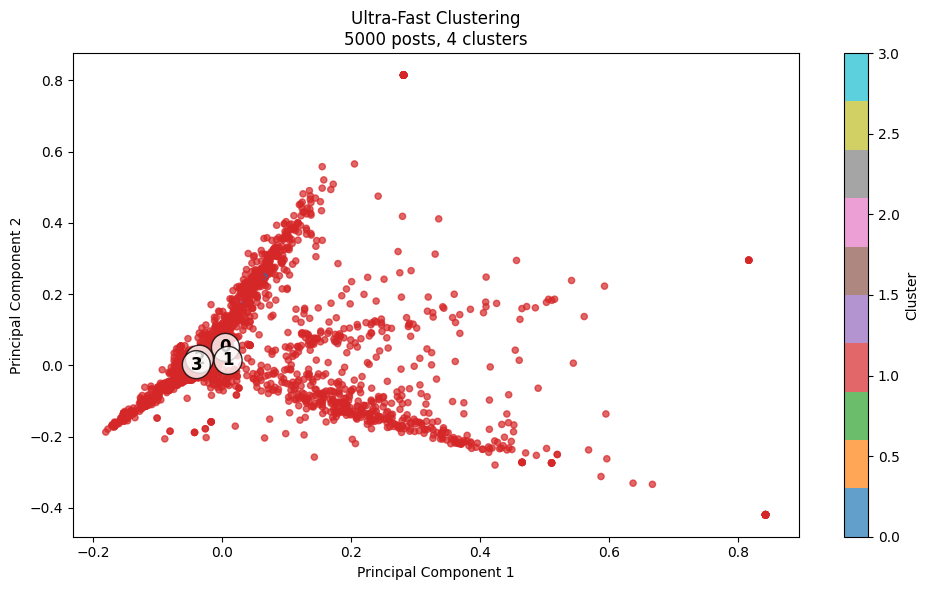


 COMPLETED IN 5.5 SECONDS!
 Cluster distribution:
   Cluster 0: 9 posts (0.2%)
   Cluster 1: 4949 posts (99.0%)
   Cluster 2: 23 posts (0.5%)
   Cluster 3: 19 posts (0.4%)

 Top words per cluster:
   Cluster 0: talking, half, called, just, big
   Cluster 1: like, just, don, people, think
   Cluster 2: good, play, watch, end, work
   Cluster 3: time, best, week, isn, bad
 Saved to 'ultra_fast_clustered_sample.csv'


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import time


start_time = time.time()

csv_file_path = "clustered_data.csv" 
print(" Loading data...")
df = pd.read_csv(csv_file_path)
print(f" Original dataset: {df.shape}")

# Taking only a small sample for speed
SAMPLE_SIZE = 5000  
df_small = df.sample(n=min(SAMPLE_SIZE, len(df)), random_state=42)
print(f" Using sample of {len(df_small)} records for speed")


text_column = None
for col in df_small.columns:
    if any(keyword in col.lower() for keyword in ['text', 'content', 'body', 'clean_text', 'message']):
        text_column = col
        break
if text_column is None:
    text_column = df_small.columns[0]  

print(f" Using column: '{text_column}'")

# Quick cleaning
df_small = df_small.dropna(subset=[text_column])
df_small[text_column] = df_small[text_column].fillna('').astype(str)
df_small = df_small[df_small[text_column].str.strip() != '']

print(f" After cleaning: {len(df_small)} documents")

#  VECTORIZATION
print(" vectorization...")
vectorizer = TfidfVectorizer(
    max_features=300,     
    stop_words='english',
    min_df=10,             #  Ignoring rare words
    max_df=0.9,
    ngram_range=(1, 1)     
)
X = vectorizer.fit_transform(df_small[text_column])
print(f" TF-IDF matrix: {X.shape}")

#  CLUSTERING
print("clustering...")
n_clusters = 4 
kmeans = MiniBatchKMeans(
    n_clusters=n_clusters,
    random_state=42,
    batch_size=500,   
    max_iter=50,      
    n_init=3           
)
labels = kmeans.fit_predict(X)
df_small['cluster'] = labels

# Quick top words
print(" Getting top words...")
feature_names = vectorizer.get_feature_names_out()
top_words = {}
for i in range(n_clusters):
    cluster_mask = labels == i
    if cluster_mask.sum() > 0:
        word_scores = np.array(X[cluster_mask].sum(axis=0)).flatten()
        top_indices = word_scores.argsort()[-5:][::-1]  # Only top 5 words
        top_words[i] = [feature_names[idx] for idx in top_indices]

#  VISUALIZATION
print("Creating visualization...")
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', alpha=0.7, s=20)

# Simple labels only
for i in range(n_clusters):
    cluster_points = X_2d[labels == i]
    if len(cluster_points) > 0:
        center = cluster_points.mean(axis=0)
        plt.text(center[0], center[1], f'{i}', fontsize=12, weight='bold',
                bbox=dict(boxstyle="circle,pad=0.3", facecolor='white', alpha=0.8))

plt.title(f'Ultra-Fast Clustering\n{len(df_small)} posts, {n_clusters} clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

elapsed = time.time() - start_time
print(f"\n COMPLETED IN {elapsed:.1f} SECONDS!")
print(f" Cluster distribution:")
for i in range(n_clusters):
    count = (labels == i).sum()
    print(f"   Cluster {i}: {count} posts ({count/len(labels)*100:.1f}%)")

print("\n Top words per cluster:")
for i, words in top_words.items():
    print(f"   Cluster {i}: {', '.join(words)}")


df_small.to_csv('ultra_fast_clustered_sample.csv', index=False)
print(" Saved to 'ultra_fast_clustered_sample.csv'")

Dataset ready: 989103 rows


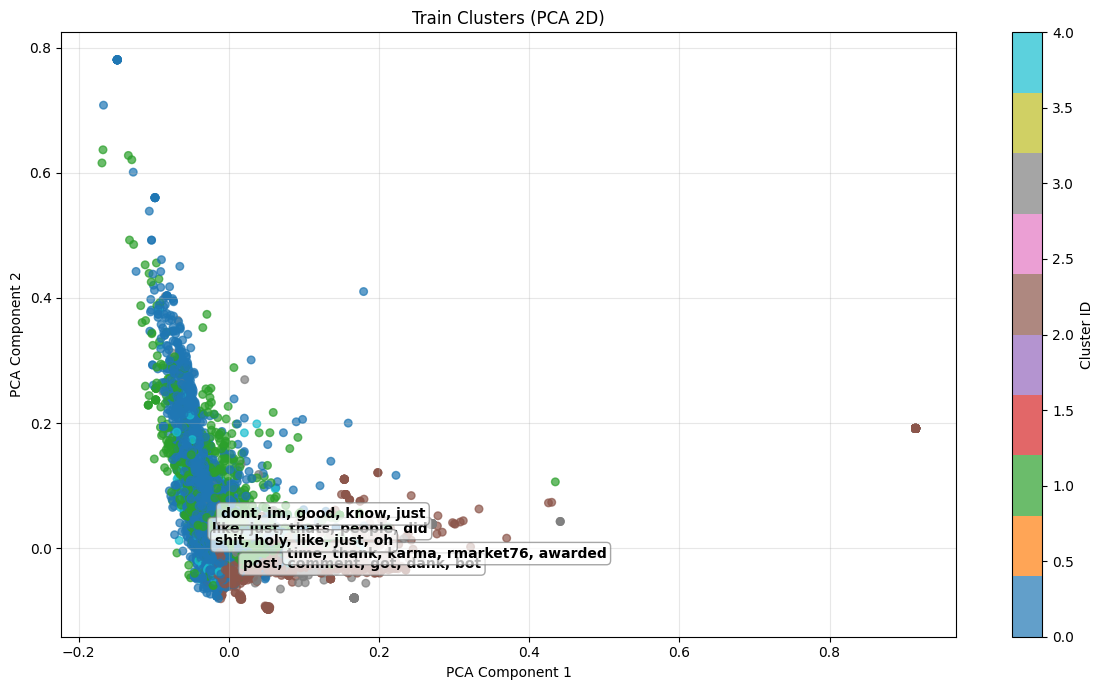

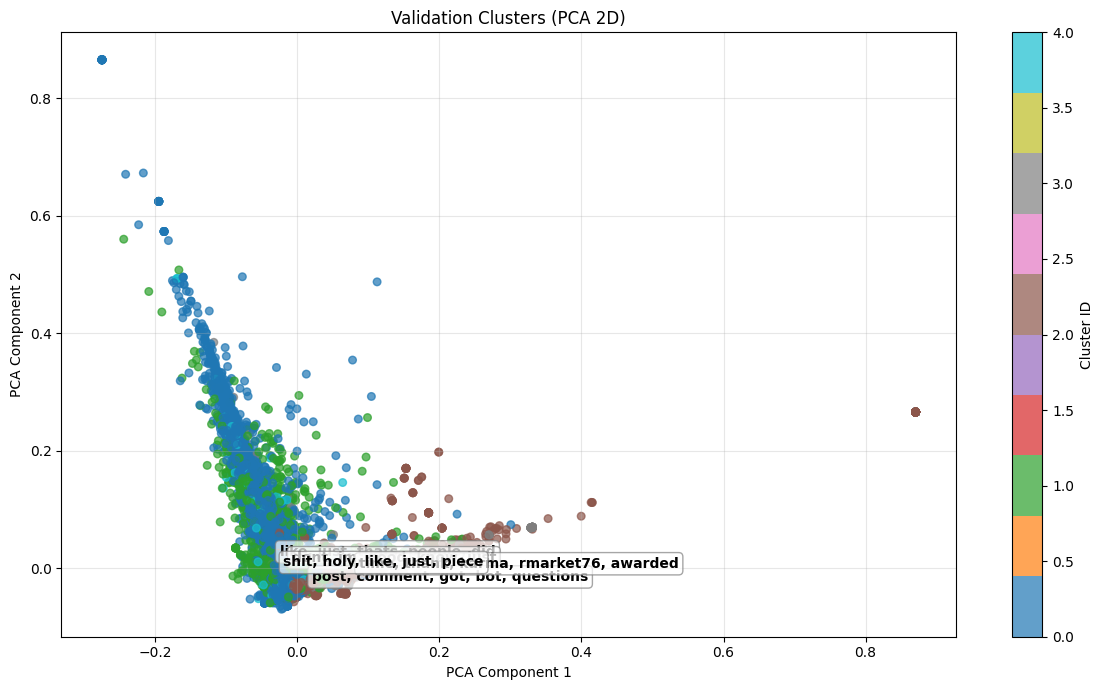

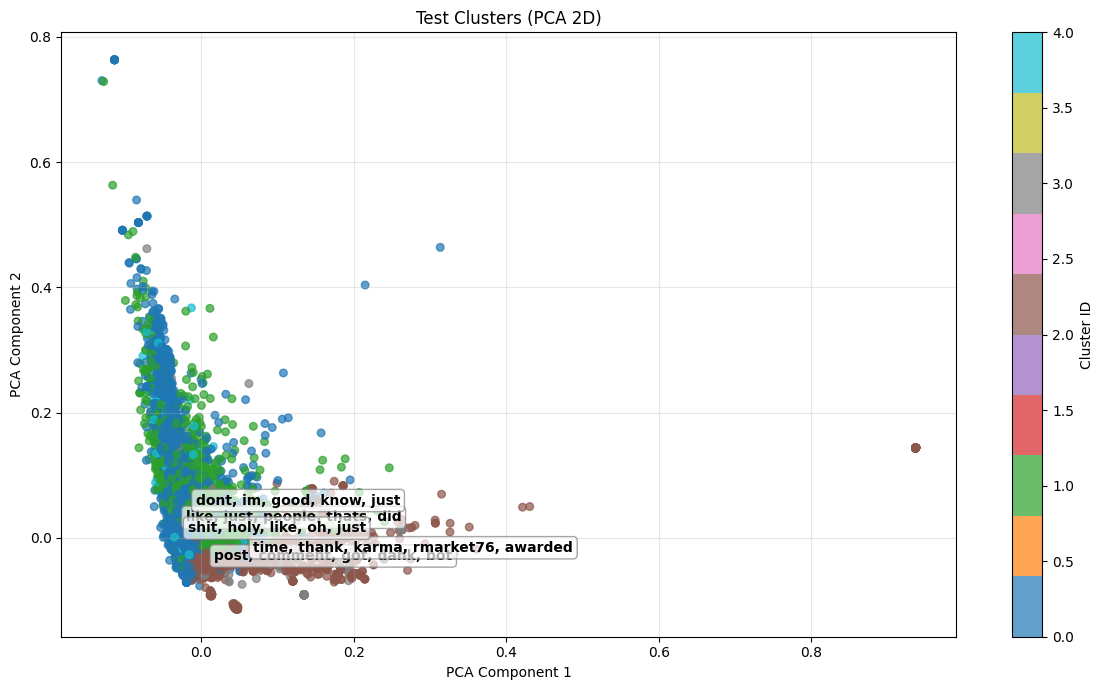

Saved clustered datasets with top words and cluster IDs.


In [ ]:
 # MiniBatch K-Means Clustering, Dimensionality Reduction (SVD), TF-IDF Vectorization , PCA
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import random


df = pd.read_csv("../dataset/combined_cleaned_social_media.csv")
df['clean_text'] = df['clean_text'].fillna('').astype(str)
df = df[df['clean_text'].str.strip() != '']
df = df[df['clean_text'].str.len() >= 10]
print(f"Dataset ready: {df.shape[0]} rows")

#  custom stopwords
extra_stopwords = {'im','lol','omg','gonna','pussy','gotta','ball','boobs','yeah','dont','ass','didnt','doesnt','wanna',
                   'like','tits','just','pp','really','rt','amp','https','http','www','u','ur','r'}



X_text = df['clean_text'].values
X_train_text, X_temp_text = train_test_split(X_text, test_size=0.4, random_state=42)
X_val_text, X_test_text = train_test_split(X_temp_text, test_size=0.5, random_state=42)


# TF-IDF Vectorization

vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english', 
    min_df=2,
    max_df=0.8
)
X_train = vectorizer.fit_transform(X_train_text)
X_val = vectorizer.transform(X_val_text)
X_test = vectorizer.transform(X_test_text)
feature_names = vectorizer.get_feature_names_out()


#  Dimensionality Reduction (SVD)

svd = TruncatedSVD(n_components=50, random_state=42)
X_train_reduced = svd.fit_transform(X_train)
X_val_reduced = svd.transform(X_val)
X_test_reduced = svd.transform(X_test)


# MiniBatch K-Means Clustering

n_clusters = 5
kmeans = MiniBatchKMeans(
    n_clusters=n_clusters,
    random_state=42,
    batch_size=1000,
    max_iter=100
)
train_labels = kmeans.fit_predict(X_train_reduced)
val_labels = kmeans.predict(X_val_reduced)
test_labels = kmeans.predict(X_test_reduced)


# Add clusters to DataFrames

df_train = pd.DataFrame({'text': X_train_text, 'cluster': train_labels})
df_val = pd.DataFrame({'text': X_val_text, 'cluster': val_labels})
df_test = pd.DataFrame({'text': X_test_text, 'cluster': test_labels})


# Extracting top words per cluster

def get_top_words(X_sparse, labels, feature_names, top_n=5):
    top_words_dict = {}
    for cluster_id in np.unique(labels):
        cluster_idx = np.where(labels == cluster_id)[0]
        word_scores = np.array(X_sparse[cluster_idx].sum(axis=0)).flatten()
        top_indices = word_scores.argsort()[::-1][:top_n]
        top_words_dict[cluster_id] = [feature_names[i] for i in top_indices]
    return top_words_dict

top_words_train = get_top_words(X_train, train_labels, feature_names)
top_words_val = get_top_words(X_val, val_labels, feature_names)
top_words_test = get_top_words(X_test, test_labels, feature_names)

# Adding top words column
df_train['top_words'] = df_train['cluster'].apply(lambda c: ", ".join(top_words_train[c]))
df_val['top_words'] = df_val['cluster'].apply(lambda c: ", ".join(top_words_val[c]))
df_test['top_words'] = df_test['cluster'].apply(lambda c: ", ".join(top_words_test[c]))


#  2D PCA Plot with single annotation per cluster

def plot_clusters(X_reduced, labels, top_words_dict, sample_size=20000, title="Clusters (PCA 2D)"):
 
    sample_size = min(sample_size, X_reduced.shape[0])
    sample_idx = np.random.choice(X_reduced.shape[0], size=sample_size, replace=False)
    X_sample = X_reduced[sample_idx]
    labels_sample = labels[sample_idx]

    pca_2d = PCA(n_components=2, random_state=42)
    X_2d = pca_2d.fit_transform(X_sample)

    plt.figure(figsize=(12,7))
    scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_sample, cmap='tab10', s=30, alpha=0.7)
    plt.colorbar(scatter, label='Cluster ID')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)

    # Annotate cluster centroid
    for cluster_id in np.unique(labels):
        # centroid in high-dimensional reduced space
        centroid = X_reduced[labels == cluster_id].mean(axis=0)
        centroid_2d = pca_2d.transform(centroid.reshape(1, -1))[0]
        words_text = ", ".join(top_words_dict[cluster_id])
        plt.text(centroid_2d[0], centroid_2d[1], words_text,
                 fontsize=10, fontweight='bold',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round'))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plotting train, val, test
plot_clusters(X_train_reduced, train_labels, top_words_train, title="Train Clusters (PCA 2D)")
plot_clusters(X_val_reduced, val_labels, top_words_val, title="Validation Clusters (PCA 2D)")
plot_clusters(X_test_reduced, test_labels, top_words_test, title="Test Clusters (PCA 2D)")


df_train.to_parquet("train_clustered.parquet", index=False, compression='snappy')
df_val.to_parquet("val_clustered.parquet", index=False, compression='snappy')
df_test.to_parquet("test_clustered.parquet", index=False, compression='snappy')
print("Saved clustered datasets with top words and cluster IDs.")



In [ ]:
!pip install -q sentence-transformers
#Bert embedding and K-means
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


df = pd.read_csv("clustered_data.csv")


SAMPLE_SIZE = 5000
df = df.sample(n=min(SAMPLE_SIZE, len(df)), random_state=42)


text_column = None
for col in df.columns:
    if any(k in col.lower() for k in ['text','content','body','clean','msg']):
        text_column = col
        break
if text_column is None:
    text_column = df.columns[0]

texts = df[text_column].astype(str).tolist()


# Sentence-BERT embeddings
print("Encoding texts with Sentence-BERT...")
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts, batch_size=64, show_progress_bar=True, convert_to_numpy=True)

print(f"Embeddings shape: {embeddings.shape}")



results = []
for k in range(2, 12):
    print(f"Clustering with K={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    
    sil = silhouette_score(embeddings, labels)
    results.append([k, sil])

# Results DataFrame
results_df = pd.DataFrame(results, columns=["K","Silhouette"])
print("\nSilhouette scores by K:")
print(results_df)

best_k = results_df.iloc[results_df["Silhouette"].idxmax()]["K"]
print(f"\n Best K = {int(best_k)}")


# clustering with best K
final_kmeans = KMeans(n_clusters=int(best_k), random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(embeddings)
df['cluster'] = final_labels


df.to_csv("sbert_clustered_sample.csv", index=False)
print("Saved clustered sample to 'sbert_clustered_sample.csv'")


g:\CSE445_Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Encoding texts with Sentence-BERT...


Batches: 100%|██████████| 79/79 [00:33<00:00,  2.34it/s]


Embeddings shape: (5000, 384)
Clustering with K=2...
Clustering with K=3...
Clustering with K=4...
Clustering with K=5...
Clustering with K=6...
Clustering with K=7...
Clustering with K=8...
Clustering with K=9...
Clustering with K=10...
Clustering with K=11...

Silhouette scores by K:
    K  Silhouette
0   2    0.018617
1   3    0.019786
2   4    0.025065
3   5    0.025586
4   6    0.026560
5   7    0.025619
6   8    0.027308
7   9    0.026391
8  10    0.027778
9  11    0.026542

 Best K = 10
Saved clustered sample to 'sbert_clustered_sample.csv'


In [9]:
! pip install --upgrade pip setuptools wheel


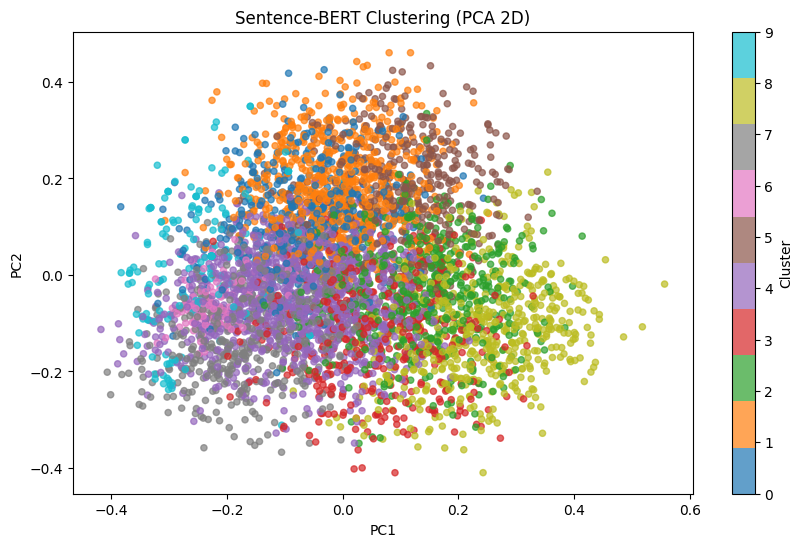

In [82]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(10,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=df['cluster'], cmap='tab10', s=20, alpha=0.7)
plt.title("Sentence-BERT Clustering (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
#Multiple models ( HBSCAN, K-means, Agglomerative, Gaussian Mixture)
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.pairwise import cosine_similarity

#  HDBSCAN
try:
    import hdbscan
    hdbscan_available = True
except:
    hdbscan_available = False
    print("HDBSCAN not installed. Skipping HDBSCAN clustering.")


df = pd.read_csv("clustered_data.csv")
SAMPLE_SIZE = 3000
df = df.sample(n=min(SAMPLE_SIZE, len(df)), random_state=42)


text_column = None
for col in df.columns:
    if any(k in col.lower() for k in ['text','content','body','clean','msg']):
        text_column = col
        break
if text_column is None:
    text_column = df.columns[0]

texts = df[text_column].astype(str).tolist()

# Sentence-BERT embeddings
print("Encoding texts with Sentence-BERT...")
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts, batch_size=64, show_progress_bar=True, convert_to_numpy=True)
print(f"Embeddings shape: {embeddings.shape}")


def cosine_intra_inter(labels, embeddings):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    intra_sim = []
    centroids = []
    
    for i in range(n_clusters):
        cluster_points = embeddings[labels == i]
        if len(cluster_points) > 1:
            sim_matrix = cosine_similarity(cluster_points)
            n = len(cluster_points)
            avg_sim = (np.sum(sim_matrix) - n) / (n*(n-1))
            intra_sim.append(avg_sim)
        else:
            intra_sim.append(1.0)
        centroids.append(cluster_points.mean(axis=0))
    
    centroids = np.array(centroids)
    inter_sim_matrix = cosine_similarity(centroids)
    n = n_clusters
    inter_sim = (np.sum(inter_sim_matrix) - n) / (n*(n-1)) if n > 1 else 0
    
    return np.mean(intra_sim), inter_sim

def evaluate_model(name, labels, embeddings):
    result = {"Model": name}
    # Excluding noise for silhouette if using HDBSCAN/DBSCAN
    if -1 in labels:
        mask = labels != -1
        sil = silhouette_score(embeddings[mask], labels[mask]) if mask.sum() > 1 else np.nan
    else:
        sil = silhouette_score(embeddings, labels)
    dbi = davies_bouldin_score(embeddings, labels)
    chi = calinski_harabasz_score(embeddings, labels)
    intra, inter = cosine_intra_inter(labels, embeddings)
    
    result.update({
        "Silhouette": sil,
        "Davies-Bouldin": dbi,
        "Calinski-Harabasz": chi,
        "Cosine Intra": intra,
        "Cosine Inter": inter
    })
    return result

#  Run models
results = []
n_clusters = 10  

#  KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(embeddings)
results.append(evaluate_model("KMeans", labels, embeddings))

#  Agglomerative
agg = AgglomerativeClustering(n_clusters=n_clusters, metric='cosine', linkage='average')

labels = agg.fit_predict(embeddings)
results.append(evaluate_model("Agglomerative", labels, embeddings))

#  Gaussian Mixture
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
labels = gmm.fit_predict(embeddings)
results.append(evaluate_model("GaussianMixture", labels, embeddings))

#  HDBSCAN 
if hdbscan_available:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=30, metric='euclidean')
    labels = clusterer.fit_predict(embeddings)
    results.append(evaluate_model("HDBSCAN", labels, embeddings))

#  Results summary 
df_results = pd.DataFrame(results)
print("\nClustering Metrics Comparison:")
print(df_results)


HDBSCAN not installed. Skipping HDBSCAN clustering.
Encoding texts with Sentence-BERT...


Batches: 100%|██████████| 47/47 [00:22<00:00,  2.10it/s]


Embeddings shape: (3000, 384)

Clustering Metrics Comparison:
             Model  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0           KMeans    0.026078        4.774310          35.375290   
1    Agglomerative    0.011630        5.592162          18.506863   
2  GaussianMixture    0.026078        4.774310          35.375290   

   Cosine Intra  Cosine Inter  
0      0.193233      0.271298  
1      0.152365      0.238678  
2      0.193233      0.271298  


PCA 2D shape: (3000, 2)


C:\Users\User\AppData\Local\Temp\ipykernel_224300\3437793893.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


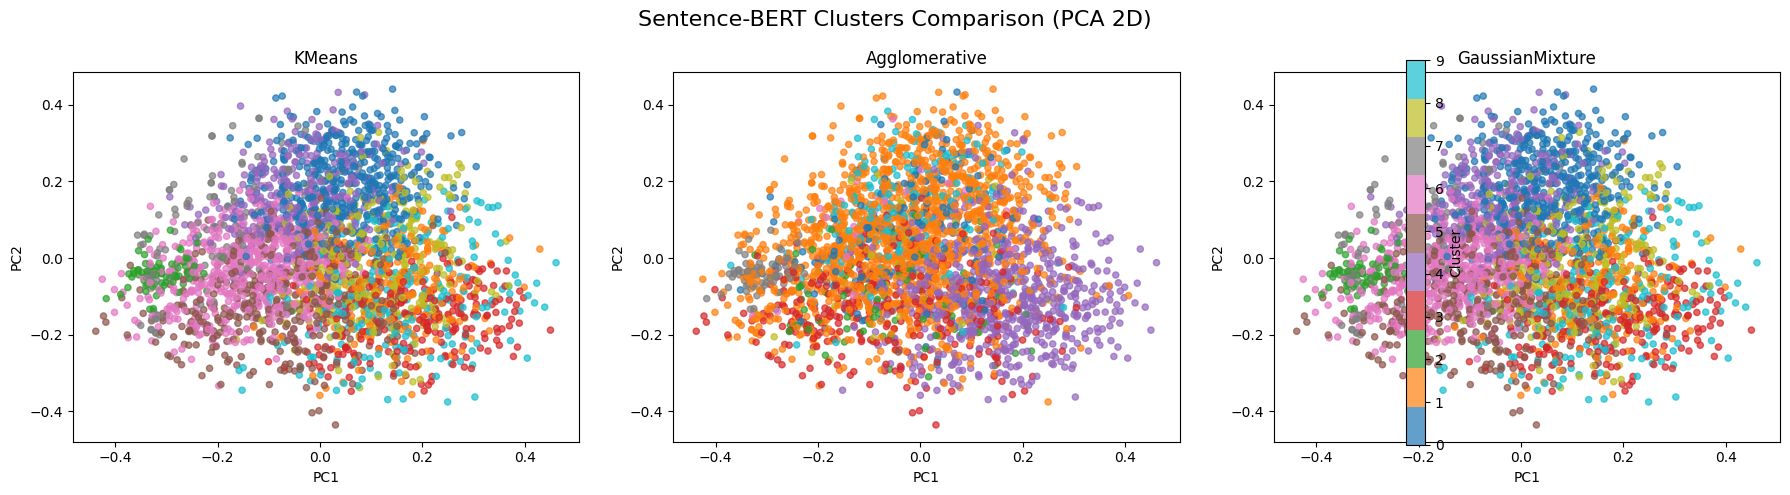

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Models and labels
models = {
    "KMeans": kmeans.fit_predict(embeddings),
    "Agglomerative": AgglomerativeClustering(n_clusters=n_clusters, metric='cosine', linkage='average').fit_predict(embeddings),
    "GaussianMixture": GaussianMixture(n_components=n_clusters, random_state=42).fit_predict(embeddings)
}

# PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(embeddings)
print(f"PCA 2D shape: {X_2d.shape}")

# Plot settings
fig, axes = plt.subplots(1, len(models), figsize=(18, 5))
if len(models) == 1:
    axes = [axes]

for ax, (name, labels) in zip(axes, models.items()):
    scatter = ax.scatter(
        X_2d[:, 0], X_2d[:, 1],
        c=labels, cmap='tab10',
        alpha=0.7, s=20
    )
    ax.set_title(name)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

# Shared colorbar
fig.colorbar(scatter, ax=axes, orientation='vertical', label='Cluster')
plt.suptitle("Sentence-BERT Clusters Comparison (PCA 2D)", fontsize=16)
plt.tight_layout()
plt.show()


 TREND DETECTION WITH  DATASET
  dataset shape: (1017100, 3)
 Columns: ['text', 'source', 'clean_text']
 Using text column: 'clean_text'
Using sample of 10,000 posts for faster analysis

 ANALYZING TRENDS IN YOUR DATASET...
   After cleaning: 8789 valid posts
Analyzing text patterns...
   Vocabulary size: 800 terms
 Clustering for trend discovery...
 TRENDS FOUND : 

1.  Sports & Events
    Volume: 1046 posts (11.9% of data)
    Key Terms: want, ive
    Engagement Score: 3.0/10
    Sample Discussions:
      1. because the fact that we waste our time with their nonsense asylum claims is bullshit already name a country in central ...
      2. she wasnt then except locally at that point she was just the presidents wife which leads to something else ive noticed d...

2.  Personal Stories
    Volume: 639 posts (7.3% of data)
    Key Terms: looks, feel
    Engagement Score: 1.8/10
    Sample Discussions:
      1. we just dont know we dont have clear evidence of what that progression would lo

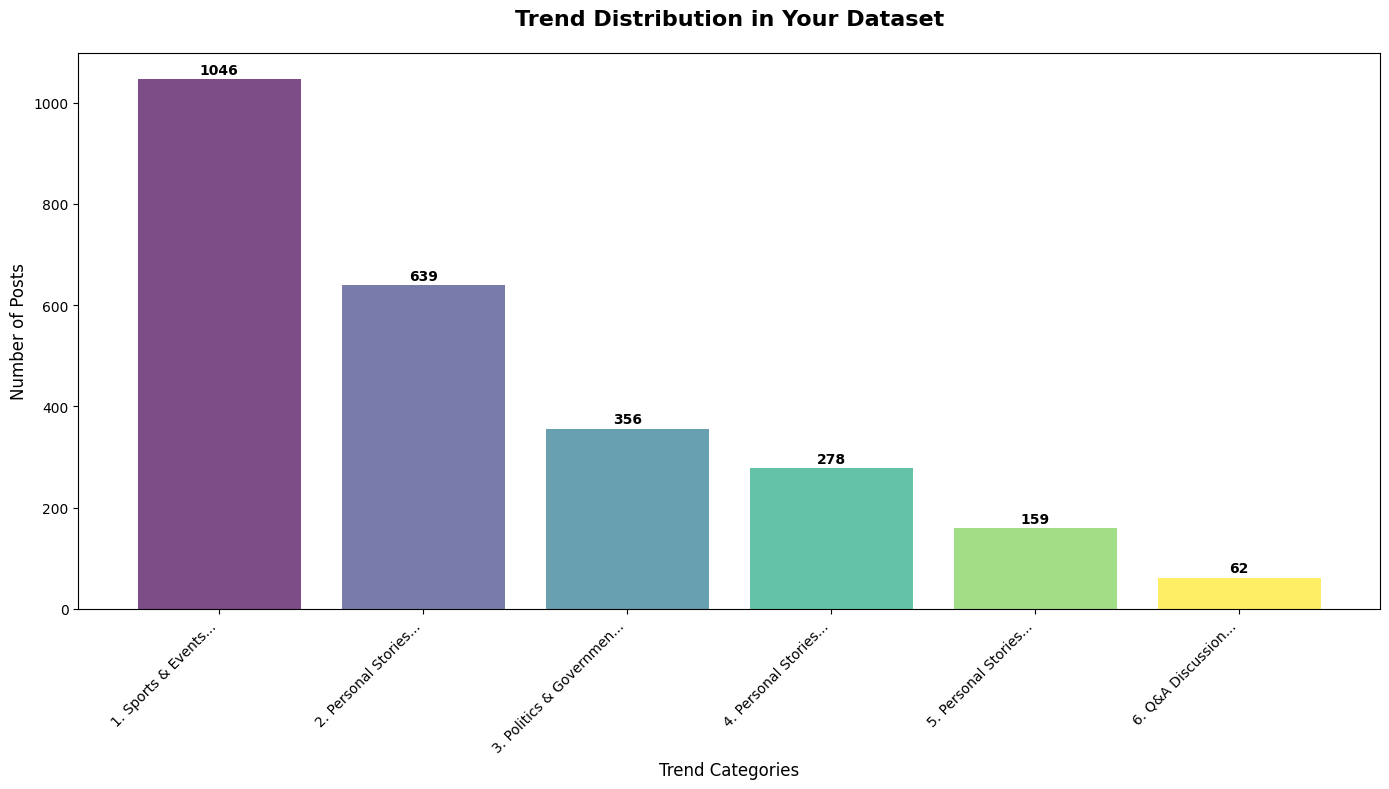


 SAMPLE OF RAW DATA (first 3 posts):
--------------------------------------------------
1. your dog looks very similar to my dog how old is your dog...
2. your chemistry puns are so basic...
3. because the fact that we waste our time with their nonsense asylum claims is bullshit already name a country in central and south america that you per...


In [ ]:
#categorizing trend , TF-IDF Vectorizer, K-Means Clustering
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print(" TREND DETECTION WITH  DATASET")
print("=" * 60)


df = pd.read_csv('../dataset/combined_cleaned_social_media.csv')  

print(f"  dataset shape: {df.shape}")
print(f" Columns: {df.columns.tolist()}")


text_column = None
text_candidates = ['clean_text', 'text', 'body', 'content', 'message', 'tweet', 'post', 'comment']

for candidate in text_candidates:
    if candidate in df.columns:
        text_column = candidate
        break

if text_column is None:
 
    string_cols = df.select_dtypes(include=['object']).columns
    text_column = string_cols[0] if len(string_cols) > 0 else df.columns[0]

print(f" Using text column: '{text_column}'")


if len(df) > 10000:
    df_analysis = df.sample(n=10000, random_state=42)
    print(f"Using sample of 10,000 posts for faster analysis")
else:
    df_analysis = df.copy()
    print(f" Using all {len(df)} posts")

def extract_real_trends(df, text_column, n_trends=8):
    """
    Extract actual meaningful trends 
    """
   
    
    
    texts = df[text_column].fillna('').astype(str)
    
    cleaned_texts = []
    for text in texts:
        if len(text.strip()) > 25:  
            # Basic cleaning
            text = re.sub(r'http\S+', '', text)  
            text = re.sub(r'@\w+', '', text)     
            text = re.sub(r'[^\w\s]', ' ', text) 
            text = ' '.join(text.split())       
            cleaned_texts.append(text.lower())
    
    print(f"   After cleaning: {len(cleaned_texts)} valid posts")
    
    # TF-IDF with focus on specific terms 
    print("Analyzing text patterns...")
    vectorizer = TfidfVectorizer(
        max_features=800,
        stop_words='english',
        min_df=5,           # Ignoring very rare terms
        max_df=0.4,         # Ignoring overly common terms 
        ngram_range=(1, 2), # Including phrases
        analyzer='word'
    )
    
    X = vectorizer.fit_transform(cleaned_texts)
    feature_names = vectorizer.get_feature_names_out()
    
    print(f"   Vocabulary size: {len(feature_names)} terms")
    
    
    print(" Clustering for trend discovery...")
    kmeans = KMeans(n_clusters=n_trends, random_state=42, n_init=5)
    cluster_labels = kmeans.fit_predict(X)
    
    
    trends = []
    
    for cluster_id in range(n_trends):
        cluster_mask = cluster_labels == cluster_id
        cluster_texts = [cleaned_texts[i] for i in range(len(cleaned_texts)) if cluster_labels[i] == cluster_id]
        
        if len(cluster_texts) > 10:  
            
            word_scores = np.array(X[cluster_mask].sum(axis=0)).flatten()
            top_indices = word_scores.argsort()[-20:][::-1]  
            raw_keywords = [feature_names[idx] for idx in top_indices]
            
        
            meaningful_keywords = filter_meaningful_keywords(raw_keywords, cluster_texts)
            
            if meaningful_keywords: 
                trend_topic = identify_trend_topic(meaningful_keywords, cluster_texts)
                
                trends.append({
                    'trend_id': cluster_id,
                    'topic': trend_topic,
                    'size': len(cluster_texts),
                    'percentage': (len(cluster_texts) / len(cleaned_texts)) * 100,
                    'keywords': meaningful_keywords[:8],  
                    'sample_posts': cluster_texts[:3],   
                    'engagement_score': calculate_engagement(cluster_texts)
                })
    
    # Sort by size (most popular trends first)
    return sorted(trends, key=lambda x: x['size'], reverse=True)

def filter_meaningful_keywords(keywords, texts):
    """
    Filter out generic words to find meaningful trend indicators
    """
    
    generic_words = {
        'like', 'just', 'know', 'think', 'people', 'really', 'would', 'could', 
        'should', 'dont', 'cant', 'wont', 'get', 'got', 'see', 'look', 'said',
        'say', 'make', 'made', 'time', 'good', 'great', 'bad', 'better', 'best',
        'right', 'wrong', 'way', 'thing', 'things', 'stuff', 'something', 'anything',
        'maybe', 'probably', 'actually', 'literally', 'basically', 'seriously'
    }
    
    # Filter and score keywords
    meaningful = []
    for keyword in keywords:
        if (keyword not in generic_words and 
            len(keyword) > 2 and 
            not keyword.isdigit()):
            
            
            keyword_count = sum(1 for text in texts if keyword in text.lower())
            if keyword_count > len(texts) * 0.1:  
                meaningful.append(keyword)
    
    return meaningful[:15]  

def identify_trend_topic(keywords, texts):
    """
    Identify what kind of trend this cluster represents
    """
    all_text = ' '.join(texts).lower()
    keyword_str = ' '.join(keywords).lower()
    
    # Trend categories with specific indicators
    categories = {
        'Politics & Government': [
            'trump', 'biden', 'president', 'election', 'government', 'senate', 'congress',
            'vote', 'law', 'policy', 'democrat', 'republican', 'administration', 'bill'
        ],
        'Entertainment & Movies': [
            'movie', 'film', 'marvel', 'disney', 'netflix', 'actor', 'director',
            'trailer', 'scene', 'character', 'plot', 'cinema', 'hollywood', 'oscar'
        ],
        'Gaming & Esports': [
            'game', 'gaming', 'player', 'playstation', 'xbox', 'nintendo', 'steam',
            'fortnite', 'minecraft', 'cod', 'level', 'character', 'multiplayer', 'console'
        ],
        'Technology & Apps': [
            'iphone', 'android', 'apple', 'google', 'facebook', 'twitter', 'instagram',
            'app', 'update', 'software', 'phone', 'tech', 'feature', 'device', 'computer'
        ],
        'Sports & Events': [
            'game', 'team', 'player', 'season', 'win', 'score', 'nfl', 'nba', 'mlb',
            'soccer', 'football', 'basketball', 'baseball', 'championship', 'tournament'
        ],
        'Social Issues': [
            'climate', 'environment', 'health', 'education', 'justice', 'rights',
            'equality', 'protest', 'movement', 'change', 'future', 'society', 'community'
        ],
        'Personal Stories': [
            'experience', 'story', 'life', 'family', 'friend', 'relationship',
            'work', 'job', 'school', 'home', 'parent', 'child', 'love'
        ],
        'Pop Culture': [
            'celebrity', 'famous', 'star', 'music', 'artist', 'album', 'song',
            'youtube', 'tiktok', 'influencer', 'viral', 'trending', 'meme'
        ]
    }
    
    # Scoring each category
    scores = {}
    for category, markers in categories.items():
        score = sum(1 for marker in markers if marker in keyword_str or marker in all_text)
        scores[category] = score
    
    # best matching category
    best_category = max(scores, key=scores.get)
    best_score = scores[best_category]
    
    
    if best_score < 2:
        return infer_topic_from_keywords(keywords)
    else:
        return best_category

def infer_topic_from_keywords(keywords):
    """Infer topic when no clear category matches"""
    keyword_str = ' '.join(keywords).lower()
    
    if any(word in keyword_str for word in ['movie', 'film', 'show', 'actor']):
        return "Entertainment Discussion"
    elif any(word in keyword_str for word in ['game', 'play', 'player', 'win']):
        return "Gaming Discussion"
    elif any(word in keyword_str for word in ['phone', 'app', 'update', 'tech']):
        return "Technology Talk"
    elif any(word in keyword_str for word in ['time', 'day', 'week', 'year']):
        return "Current Events"
    elif any(word in keyword_str for word in ['question', 'help', 'advice', 'suggest']):
        return "Q&A Discussion"
    else:
        #  a descriptive name from top keywords
        return f"Discussion about {', '.join(keywords[:2])}"

def calculate_engagement(texts):
    """Simple engagement metric based on text characteristics"""
    if not texts:
        return 0
    
    avg_length = np.mean([len(text.split()) for text in texts])
    question_count = sum(1 for text in texts if '?' in text)
    exclamation_count = sum(1 for text in texts if '!' in text)
    
    # Simple scoring (0-10)
    score = min(10, (avg_length / 15) + (question_count / len(texts) * 3) + (exclamation_count / len(texts) * 2))
    return round(score, 1)

# EXECUTE THE TREND ANALYSIS
print("\n ANALYZING TRENDS IN YOUR DATASET...")
trends = extract_real_trends(df_analysis, text_column, n_trends=8)


print(" TRENDS FOUND : ")


if not trends:
    print(" No clear trends detected. data might be too generic or need different processing.")
else:
    for i, trend in enumerate(trends, 1):
        print(f"\n{i}.  {trend['topic']}")
        print(f"    Volume: {trend['size']} posts ({trend['percentage']:.1f}% of data)")
        print(f"    Key Terms: {', '.join(trend['keywords'][:5])}")
        print(f"    Engagement Score: {trend['engagement_score']}/10")
        
       
        if trend['sample_posts']:
            print(f"    Sample Discussions:")
            for j, post in enumerate(trend['sample_posts'][:2], 1):
                preview = post[:120] + "..." if len(post) > 120 else post
                print(f"      {j}. {preview}")

    # Summary statistics
    print(f"\n TREND ANALYSIS SUMMARY:")
    print(f"   Total trends identified: {len(trends)}")
    print(f"   Most popular trend: '{trends[0]['topic']}' ({trends[0]['percentage']:.1f}% of posts)")
    print(f"   Total posts analyzed: {len(df_analysis)}")
    
    # Visualization
    plt.figure(figsize=(14, 8))
    trend_names = [f"{i+1}. {trend['topic'][:20]}..." for i, trend in enumerate(trends)]
    trend_sizes = [trend['size'] for trend in trends]
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(trends)))
    bars = plt.bar(trend_names, trend_sizes, color=colors, alpha=0.7)
    
    plt.title('Trend Distribution in Your Dataset', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Trend Categories', fontsize=12)
    plt.ylabel('Number of Posts', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Adding value labels on bars
    for bar, size in zip(bars, trend_sizes):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'{size}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()


print(f"\n SAMPLE OF RAW DATA (first 3 posts):")
print("-" * 50)
for i in range(min(3, len(df_analysis))):
    text_preview = str(df_analysis.iloc[i][text_column])[:150] + "..." 
    print(f"{i+1}. {text_preview}")

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re
from collections import Counter

print(" TREND DETECTION WITH STABILITY VALIDATION")
print("=" * 60)

df = pd.read_csv('clustered_data.csv')  

# Auto-detect text column
text_column = 'clean_text' if 'clean_text' in df.columns else df.columns[0]
print(f" Dataset: {df.shape}, Text column: '{text_column}'")

def robust_trend_analysis(df, text_column, sample_size=8000, n_clusters=8, n_validation_runs=3):
    """
    Robust trend analysis with multiple validation checks
    """
    
   
    if len(df) > sample_size:
        df_analysis = df.sample(n=sample_size, random_state=42)
        print(f"Using sample of {sample_size} posts")
    else:
        df_analysis = df.copy()
        print(f" Using all {len(df)} posts")
    
    # MAIN ANALYSIS on primary sample
    print("\n MAIN TREND ANALYSIS...")
    main_trends, X, feature_names = extract_trends_with_metrics(df_analysis, text_column, n_clusters)
    
    # STABILITY VALIDATION
    print("\n STABILITY VALIDATION...")
    stability_results = validate_trend_stability(df, text_column, n_runs=n_validation_runs)
    
    return main_trends, stability_results

def extract_trends_with_metrics(df, text_column, n_clusters):
 
    
    # Clean and vectorize
    texts = clean_texts(df[text_column])
    vectorizer = TfidfVectorizer(max_features=800, stop_words='english', min_df=5, max_df=0.4)
    X = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    
    # Cluster with quality assessment
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=5)
    labels = kmeans.fit_predict(X)
    
    # Calculate clustering quality
    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else 0
    
    print(f" Clustering Quality:")
    print(f"   - Silhouette Score: {silhouette:.3f}")
    print(f"   - Cluster balance: {np.std(np.bincount(labels)):.1f} (lower = more balanced)")
    
    # Extract trends
    trends = []
    for cluster_id in range(n_clusters):
        cluster_mask = labels == cluster_id
        cluster_texts = [texts[i] for i in range(len(texts)) if labels[i] == cluster_id]
        
        if len(cluster_texts) > len(texts) * 0.05:  # At least 5% of data
            trends.append(analyze_cluster_trend(cluster_id, cluster_texts, X, cluster_mask, feature_names))
    
    return sorted(trends, key=lambda x: x['size'], reverse=True), X, feature_names

def validate_trend_stability(df, text_column, n_runs=3, sample_size=4000):
    
    
    consistent_trends = Counter()
    
    for run in range(n_runs):
        df_sample = df.sample(n=min(sample_size, len(df)), random_state=run)
        texts = clean_texts(df_sample[text_column])
        
        if len(texts) > 100:  
            vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
            X = vectorizer.fit_transform(texts)
            
            kmeans = KMeans(n_clusters=6, random_state=run, n_init=3)
            labels = kmeans.fit_predict(X)
            
            # trend detection for validation
            for cluster_id in range(6):
                cluster_mask = labels == cluster_id
                if cluster_mask.sum() > len(texts) * 0.1:  # Substantial cluster
                    cluster_texts = [texts[i] for i in range(len(texts)) if labels[i] == cluster_id]
                    trend_topic = identify_trend_topic_simple(cluster_texts)
                    consistent_trends[trend_topic] += 1
    
    print(" Trends found across multiple runs:")
    for trend, count in consistent_trends.most_common():
        if count > 1:  
            print(f"    {trend}: {count}/{n_runs} runs")
    
    return consistent_trends

def identify_trend_topic_simple(texts):
    all_text = ' '.join(texts).lower()
    
    categories = {
        'Politics': ['trump', 'biden', 'election', 'government', 'president'],
        'Entertainment': ['movie', 'film', 'show', 'actor', 'character'],
        'Gaming': ['game', 'player', 'play', 'win', 'level'],
        'Technology': ['phone', 'app', 'update', 'tech', 'computer'],
        'Sports': ['game', 'team', 'player', 'win', 'season'],
        'Social': ['people', 'life', 'time', 'friend', 'family']
    }
    
    for category, keywords in categories.items():
        if any(keyword in all_text for keyword in keywords):
            return category
    
    return 'General Discussion'

def clean_texts(text_series):
    """Clean text data"""
    texts = []
    for text in text_series.fillna('').astype(str):
        if len(text.strip()) > 25:
            text = re.sub(r'http\S+', '', text)
            text = re.sub(r'[^\w\s]', ' ', text)
            text = ' '.join(text.split())
            texts.append(text.lower())
    return texts

def analyze_cluster_trend(cluster_id, cluster_texts, X, cluster_mask, feature_names):
    """Analyze a single cluster for trends"""
    word_scores = np.array(X[cluster_mask].sum(axis=0)).flatten()
    top_indices = word_scores.argsort()[-15:][::-1]
    raw_keywords = [feature_names[idx] for idx in top_indices]
    
    meaningful_keywords = [kw for kw in raw_keywords if kw not in 
                          {'like', 'just', 'know', 'think', 'people', 'really'}]
    
    trend_topic = identify_trend_topic_simple(cluster_texts)
    
    return {
        'trend_id': cluster_id,
        'topic': trend_topic,
        'size': len(cluster_texts),
        'keywords': meaningful_keywords[:6],
        'sample_posts': cluster_texts[:2]
    }

#  ROBUST ANALYSIS
print(" TREND ANALYSIS...")
main_trends, stability_results = robust_trend_analysis(df, text_column)


print("FINAL TREND REPORT")


for i, trend in enumerate(main_trends, 1):
    print(f"\n{i}. {trend['topic']}")
    print(f"    {trend['size']} posts | Keywords: {', '.join(trend['keywords'][:4])}")
    if trend['sample_posts']:
        print(f"    Sample: {trend['sample_posts'][0][:100]}...")

 TREND DETECTION WITH STABILITY VALIDATION
 Dataset: (1017100, 4), Text column: 'clean_text'
 TREND ANALYSIS...
Using sample of 8000 posts

 MAIN TREND ANALYSIS...
 Clustering Quality:
   - Silhouette Score: 0.025
   - Cluster balance: 1570.4 (lower = more balanced)

 STABILITY VALIDATION...
 Trends found across multiple runs:
    Politics: 5/3 runs
FINAL TREND REPORT

1. Politics
    5003 posts | Keywords: im, time, thats, good
    Sample: your dog looks very similar to my dog how old is your dog...

2. Politics
    579 posts | Keywords: im, good, game, doesnt
    Sample: she wasnt then except locally at that point she was just the presidents wife which leads to somethin...

3. Politics
    473 posts | Keywords: looks, look, feel, im
    Sample: id also like to propose we start using beacons for longdistance communition...

4. Politics
    460 posts | Keywords: dont, want, im, youre
    Sample: we just dont know we dont have clear evidence of what that progression would look like they

Dataset ready: 989103 rows
Encoding texts with Sentence-BERT...


Batches: 100%|██████████| 3091/3091 [10:07<00:00,  5.08it/s]


Embeddings shape: (593461, 384)


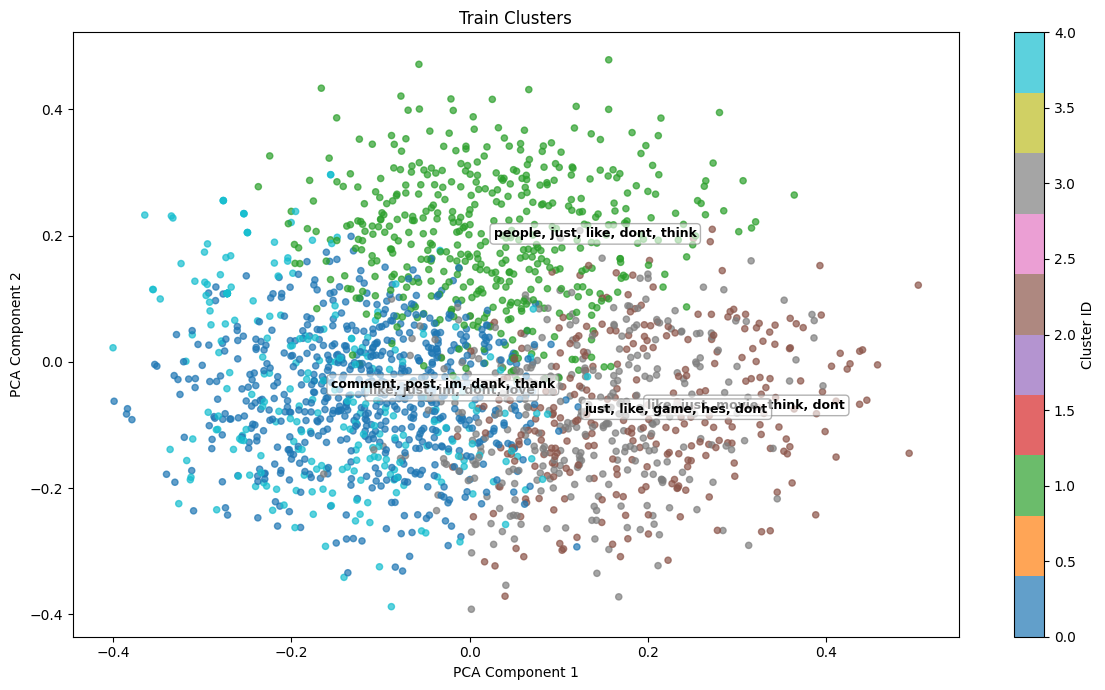

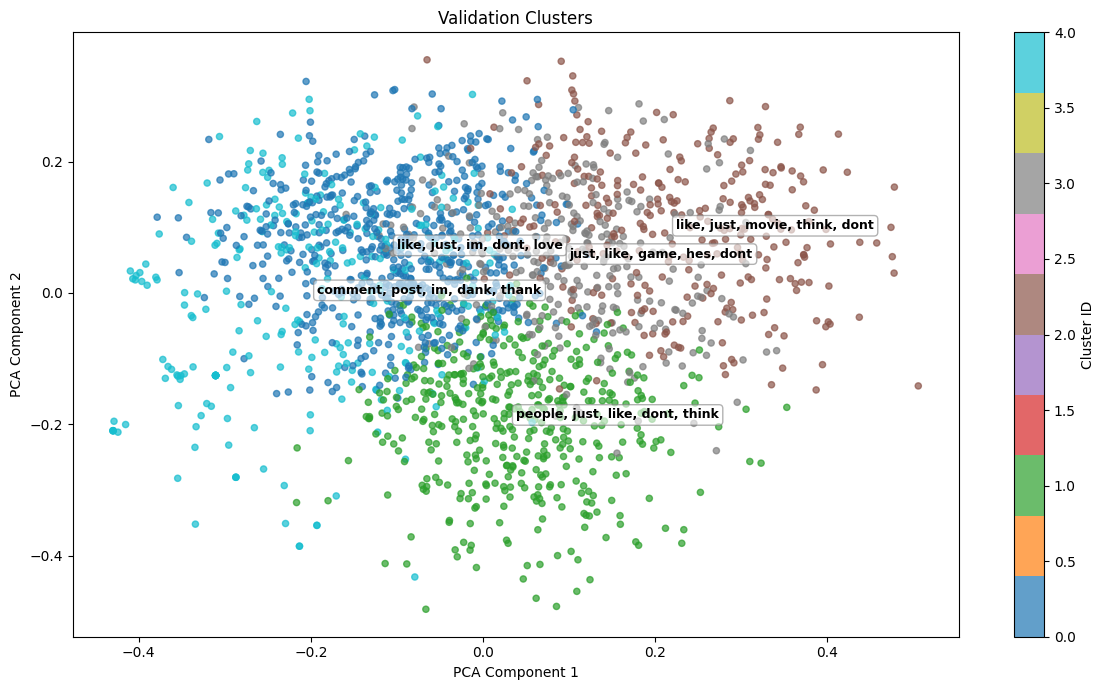

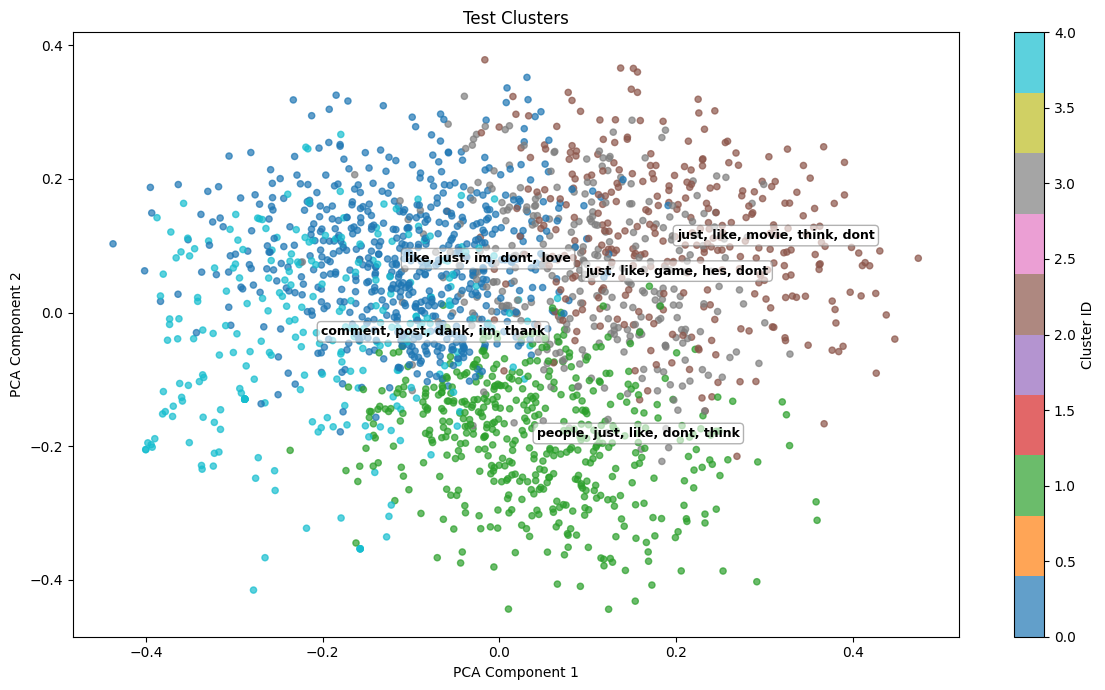

Clustered datasets saved.

Completed in 2898.4 seconds


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
import random
import time

start_time = time.time()


df = pd.read_csv("../dataset/combined_cleaned_social_media.csv")
df['clean_text'] = df['clean_text'].fillna('').astype(str)
df = df[df['clean_text'].str.strip() != '']
df = df[df['clean_text'].str.len() >= 10]
print(f"Dataset ready: {df.shape[0]} rows")


# Train / Val / Test split

X_text = df['clean_text'].values
X_train_text, X_temp_text = train_test_split(X_text, test_size=0.4, random_state=42)
X_val_text, X_test_text = train_test_split(X_temp_text, test_size=0.5, random_state=42)


#  Sentence-BERT Embeddings

print("Encoding texts with Sentence-BERT...")
model = SentenceTransformer('all-MiniLM-L6-v2')  # Small & fast, still semantic
X_train_emb = model.encode(X_train_text, batch_size=64, show_progress_bar=True, convert_to_numpy=True)
X_val_emb = model.encode(X_val_text, batch_size=64, show_progress_bar=True, convert_to_numpy=True)
X_test_emb = model.encode(X_test_text, batch_size=64, show_progress_bar=True, convert_to_numpy=True)

print(f"Embeddings shape: {X_train_emb.shape}")


n_clusters = 5
kmeans = MiniBatchKMeans(
    n_clusters=n_clusters,
    random_state=42,
    batch_size=1000,
    max_iter=100
)
train_labels = kmeans.fit_predict(X_train_emb)
val_labels = kmeans.predict(X_val_emb)
test_labels = kmeans.predict(X_test_emb)


df_train = pd.DataFrame({'text': X_train_text, 'cluster': train_labels})
df_val = pd.DataFrame({'text': X_val_text, 'cluster': val_labels})
df_test = pd.DataFrame({'text': X_test_text, 'cluster': test_labels})


from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_words_per_cluster(df_text, labels, top_n=5):
    top_words_dict = {}
    for cluster_id in np.unique(labels):
        cluster_texts = df_text[labels == cluster_id]
        if len(cluster_texts) == 0:
            top_words_dict[cluster_id] = []
            continue
        vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
        X = vectorizer.fit_transform(cluster_texts)
        feature_names = vectorizer.get_feature_names_out()
        word_scores = np.array(X.sum(axis=0)).flatten()
        top_indices = word_scores.argsort()[::-1][:top_n]
        top_words_dict[cluster_id] = [feature_names[i] for i in top_indices]
    return top_words_dict

top_words_train = get_top_words_per_cluster(X_train_text, train_labels)
top_words_val = get_top_words_per_cluster(X_val_text, val_labels)
top_words_test = get_top_words_per_cluster(X_test_text, test_labels)

df_train['top_words'] = df_train['cluster'].apply(lambda c: ", ".join(top_words_train[c]))
df_val['top_words'] = df_val['cluster'].apply(lambda c: ", ".join(top_words_val[c]))
df_test['top_words'] = df_test['cluster'].apply(lambda c: ", ".join(top_words_test[c]))


# 2D PCA Visualization

def plot_clusters(X_emb, labels, top_words_dict, sample_size=2000, title="Clusters (PCA 2D)"):
    sample_size = min(sample_size, X_emb.shape[0])
    sample_idx = np.random.choice(X_emb.shape[0], size=sample_size, replace=False)
    X_sample = X_emb[sample_idx]
    labels_sample = labels[sample_idx]

    pca = PCA(n_components=2, random_state=42)
    X_2d = pca.fit_transform(X_sample)

    plt.figure(figsize=(12,7))
    scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_sample, cmap='tab10', alpha=0.7, s=20)
    plt.colorbar(scatter, label='Cluster ID')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)

    # Annotate cluster centers
    for cluster_id in np.unique(labels):
        cluster_points = X_2d[labels_sample == cluster_id]
        if len(cluster_points) > 0:
            center = cluster_points.mean(axis=0)
            words_text = ", ".join(top_words_dict.get(cluster_id, []))
            plt.text(center[0], center[1], words_text, fontsize=9, fontweight='bold',
                     bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray', boxstyle='round'))
    plt.tight_layout()
    plt.show()

# Plot clusters
plot_clusters(X_train_emb, train_labels, top_words_train, title="Train Clusters")
plot_clusters(X_val_emb, val_labels, top_words_val, title="Validation Clusters")
plot_clusters(X_test_emb, test_labels, top_words_test, title="Test Clusters")


#  Save clustered datasets

df_train.to_parquet("train_sbert_clustered.parquet", index=False, compression='snappy')
df_val.to_parquet("val_sbert_clustered.parquet", index=False, compression='snappy')
df_test.to_parquet("test_sbert_clustered.parquet", index=False, compression='snappy')
print("Clustered datasets saved.")

elapsed = time.time() - start_time
print(f"\nCompleted in {elapsed:.1f} seconds")


g:\CSE445_Project\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular H


===== KMeans Clustering Metrics =====
Silhouette Score: 0.06157148256897926
Davies-Bouldin: 3.2510201638825706
Calinski-Harabasz: 103.44256591796875



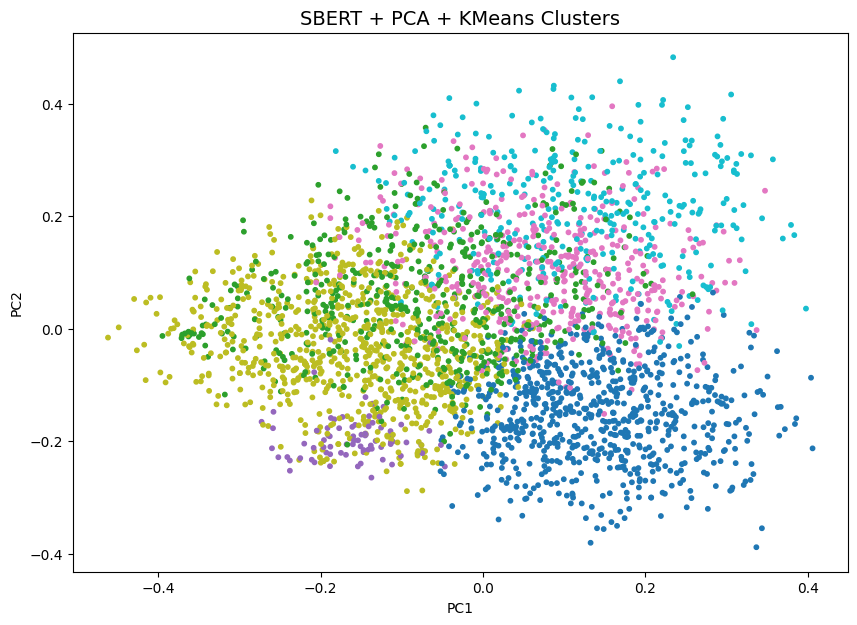

In [ ]:


# SBERT + PCA + KMeans + Full Metrics + Visualization


import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)
import matplotlib.pyplot as plt


texts = df['text'].astype(str).tolist()


# Strong SBERT embeddings

model = SentenceTransformer("all-mpnet-base-v2")

emb = model.encode(
    texts,
    normalize_embeddings=True,   # L2 normalization built-in
    show_progress_bar=True
)


#  PCA to 50D

pca = PCA(n_components=50, random_state=42)
X_50 = pca.fit_transform(emb)


#  KMeans Clustering

k = 6   
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_50)


#  Evaluation

sil = silhouette_score(X_50, labels)
db = davies_bouldin_score(X_50, labels)
ch = calinski_harabasz_score(X_50, labels)

print("\n===== KMeans Clustering Metrics =====")
print("Silhouette Score:", sil)
print("Davies-Bouldin:", db)
print("Calinski-Harabasz:", ch)
print("=====================================\n")


# PCA 2D 

pca2 = PCA(n_components=2, random_state=42)
X_2d = pca2.fit_transform(emb)

plt.figure(figsize=(10, 7))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap="tab10", s=10)
plt.title("SBERT + PCA + KMeans Clusters", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

df["cluster"] = labels
df.to_csv("clustered_kmeans_output.csv", index=False)


K=2, Silhouette Score=0.1278
K=3, Silhouette Score=0.1312
K=4, Silhouette Score=0.1058
K=5, Silhouette Score=0.1151
K=6, Silhouette Score=0.1123
K=7, Silhouette Score=0.1056
K=8, Silhouette Score=0.0895
K=9, Silhouette Score=0.1110
K=10, Silhouette Score=0.1205

Optimal number of clusters: 3
Best Silhouette Score: 0.1312


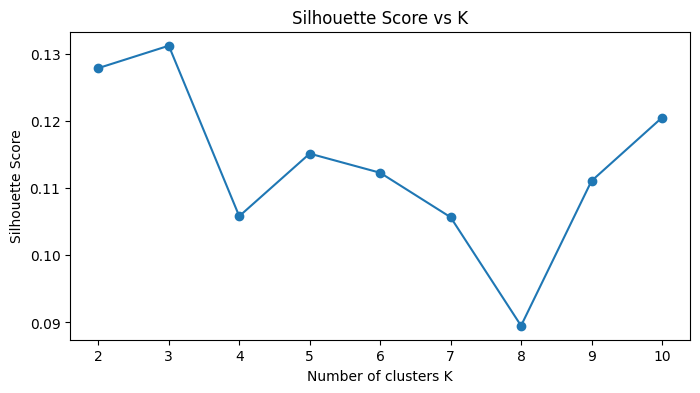

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


df = pd.read_csv("../dataset/combined_cleaned_social_media.csv")
texts = df['text'].astype(str)

# TF-IDF vectorization (sparse)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(texts)

# Dimensionality reduction using TruncatedSVD (LSA)
svd = TruncatedSVD(n_components=100, random_state=42)  
X_reduced = svd.fit_transform(X)  
# Finding best K using silhouette score
best_k = 2
best_score = -1
sil_scores = []

for k in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    labels = kmeans.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels, sample_size=10000, random_state=42)
    sil_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels
        best_model = kmeans

print(f"\nOptimal number of clusters: {best_k}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Plotting silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.show()

# Adding cluster labels to dataframe
df['cluster'] = best_labels


In [ ]:
import numpy as np

# Number of top words per cluster
top_n = 10

# Get feature names from TF-IDF
feature_names = vectorizer.get_feature_names_out()


original_space_centers = svd.inverse_transform(best_model.cluster_centers_)

for i, center in enumerate(original_space_centers):
    top_indices = center.argsort()[::-1][:top_n]
    top_features = [feature_names[j] for j in top_indices]
    print(f"\nCluster {i} top words: {', '.join(top_features)}")



Cluster 0 top words: like, just, don, people, think, know, good, time, did, really

Cluster 1 top words: right, just, know, like, think, left, people, don, fucking, ll

Cluster 2 top words: shit, got, just, holy, like, ve, don, people, good, fuck


In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_csv("../dataset/combined_cleaned_social_media.csv")
texts = df['text'].astype(str)

# Converting text to embeddings (memory-efficient)
print("Generating embeddings...")
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts, batch_size=64, show_progress_bar=True)

# Determining best K using silhouette score
best_score = -1
best_k = 2
best_labels = None
sil_scores = []

print("Finding optimal number of clusters...")
for k in range(2, 11):  # try K = 2 to 10
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels, sample_size=10000, random_state=42)
    sil_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels
        best_model = kmeans

print(f"\nOptimal number of clusters: {best_k}")
print(f"Best Silhouette Score: {best_score:.4f}")

#  Assign cluster labels to dataframe
df['cluster'] = best_labels

#  Extract top keywords per cluster
print("Extracting top keywords per cluster...")
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)
feature_names = vectorizer.get_feature_names_out()
top_n = 10

for c in range(best_k):
    cluster_indices = np.where(df['cluster'] == c)[0]
    cluster_tfidf = X_tfidf[cluster_indices]
    mean_tfidf = cluster_tfidf.mean(axis=0).A1
    top_indices = mean_tfidf.argsort()[::-1][:top_n]
    top_features = [feature_names[i] for i in top_indices]
    print(f"\nCluster {c} top words: {', '.join(top_features)}")


top_docs = 3  
for c in range(best_k):
    cluster_indices = np.where(df['cluster'] == c)[0]
    cluster_embeddings = embeddings[cluster_indices]
    # Find documents closest to cluster centroid
    centroid = best_model.cluster_centers_[c]
    distances = np.linalg.norm(cluster_embeddings - centroid, axis=1)
    top_doc_indices = distances.argsort()[:top_docs]
    print(f"\nCluster {c} top documents:")
    for idx in top_doc_indices:
        doc_idx = cluster_indices[idx]
        print(df.iloc[doc_idx]['text'][:200], "...\n") 


Generating embeddings...


Batches: 100%|██████████| 15893/15893 [1:49:28<00:00,  2.42it/s] 


Finding optimal number of clusters...
K=2, Silhouette Score=0.0176
K=3, Silhouette Score=0.0197
K=4, Silhouette Score=0.0189
K=5, Silhouette Score=0.0215
K=6, Silhouette Score=0.0225
K=7, Silhouette Score=0.0261
K=8, Silhouette Score=0.0273
K=9, Silhouette Score=0.0274
K=10, Silhouette Score=0.0269

Optimal number of clusters: 9
Best Silhouette Score: 0.0274
Extracting top keywords per cluster...

Cluster 0 top words: just, like, movie, episode, think, arya, jon, did, really, time

Cluster 1 top words: не, на, что, это, как, то, так, но, по, ты

Cluster 2 top words: just, game, like, ll, play, good, got, don, thanks, time

Cluster 3 top words: game, like, just, team, good, think, don, play, lol, year

Cluster 4 top words: like, love, look, just, looks, good, don, know, lol, oh

Cluster 5 top words: just, like, don, people, know, think, want, time, really, say

Cluster 6 top words: people, just, don, like, trump, think, gt, right, know, did

Cluster 7 top words: reddit, message, com, ht

In [ ]:
# Top entities, Hash tags
import pandas as pd
import numpy as np
import re
from collections import Counter, defaultdict
import time
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("Starting PROPER TRENDING TOPIC DETECTOR...")
start_time = time.time()

# Load data
df = pd.read_csv("../dataset/combined_cleaned_social_media.csv")
print(f"Total documents: {len(df)}")

# Sample for processing
SAMPLE_SIZE = 100000
df_sample = df.sample(n=SAMPLE_SIZE, random_state=42) if len(df) > SAMPLE_SIZE else df
texts = df_sample['text'].astype(str).tolist()
print(f"Sample size: {len(df_sample)}")

#  ENTITY EXTRACTION 
print("\n" + "="*60)
print("STEP 1: IMPROVED NAMED ENTITY EXTRACTION")
print("="*60)

# Common words to exclude (all lowercase)
COMMON_WORDS = {
    'the', 'and', 'you', 'that', 'for', 'with', 'this', 'from', 'have', 'not',
    'but', 'are', 'was', 'what', 'when', 'were', 'your', 'they', 'there',
    'their', 'about', 'would', 'could', 'should', 'some', 'them', 'then',
    'than', 'also', 'very', 'really', 'don', 'does', 'did', 'will', 'can',
    'get', 'got', 'it', 'is', 'in', 'to', 'of', 'be', 'as', 'at', 'by',
    'an', 'or', 'if', 'so', 'up', 'out', 'on', 'we', 'he', 'she', 'his',
    'her', 'him', 'me', 'my', 'mine', 'our', 'ours', 'us', 'its', 'those',
    'these', 'such', 'one', 'two', 'more', 'most', 'many', 'much', 'how',
    'why', 'where', 'who', 'which', 'whom', 'whose', 'been', 'being',
    'said', 'says', 'say', 'like', 'just', 'know', 'think', 'good', 'time'
}

# Known entities database (common people, places, brands, etc.)
KNOWN_ENTITIES = {
    'politics': {'trump', 'biden', 'obama', 'putin', 'modi', 'merkel', 'pelosi', 'schumer', 'mcconnell'},
    'entertainment': {'marvel', 'disney', 'netflix', 'hbo', 'gameofthrones', 'got', 'starwars', 'harrypotter'},
    'gaming': {'fortnite', 'minecraft', 'callofduty', 'cod', 'playstation', 'xbox', 'nintendo', 'steam'},
    'sports': {'nba', 'nfl', 'mlb', 'soccer', 'football', 'lebron', 'messi', 'ronaldo', 'federer'},
    'technology': {'apple', 'google', 'microsoft', 'amazon', 'facebook', 'twitter', 'tesla', 'spacex'},
    'geography': {'usa', 'china', 'india', 'russia', 'europe', 'uk', 'london', 'newyork', 'paris'}
}

def extract_proper_named_entities(text):
    """Extract proper named entities from text"""
    if not isinstance(text, str):
        return [], []
    
    # Extract hashtags (already trends)
    hashtags = re.findall(r'#(\w+)', text.lower())
    
    # Extract mentions
    mentions = re.findall(r'@(\w+)', text.lower())
    
    # Remove URLs, hashtags, mentions
    clean_text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    clean_text = re.sub(r'#\w+', ' ', clean_text)
    clean_text = re.sub(r'@\w+', ' ', clean_text)
    
    #  Extract capitalized sequences (proper nouns)
    entities_set1 = set()
    # Pattern for capitalized words sequence 
    cap_sequences = re.findall(r'\b([A-Z][a-z]+(?:\s+[A-Z][a-z]+)+)\b', clean_text)
    for seq in cap_sequences:
        # Filter out common sequences
        words = seq.split()
        if len(words) >= 2:
            # Check if it's not just common words
            if not all(w.lower() in COMMON_WORDS for w in words):
                entities_set1.add(seq)
    
    # Extract standalone capitalized words that are likely entities
    standalone_caps = re.findall(r'\b([A-Z][a-z]{2,})\b', clean_text)
    entities_set2 = set()
    for word in standalone_caps:
        word_lower = word.lower()
       
        if (word_lower not in COMMON_WORDS and
            word not in {'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
                        'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                        'September', 'October', 'November', 'December'} and
            len(word) > 3):
            
            is_known = False
            for category, known_set in KNOWN_ENTITIES.items():
                if word_lower in known_set:
                    is_known = True
                    break
            
            
            if is_known or any(word_lower in entity.lower() for entity in entities_set1):
                entities_set2.add(word)
    
    # Method 3: Extract product/brand names (often have special formats)
    # Look for patterns like "iPhone", "YouTube", "PlayStation"
    special_formats = re.findall(r'\b([A-Z][a-z]*[A-Z][a-z]*)\b', clean_text)
    entities_set3 = set(word for word in special_formats if len(word) > 3)
    
    # Combine all entities
    all_entities = list(entities_set1 | entities_set2 | entities_set3)
    
    # Extract meaningful phrases 
    # Clean text for phrase extraction
    text_lower = clean_text.lower()
    text_lower = re.sub(r'[^\w\s]', ' ', text_lower)
    words = text_lower.split()
    
    
    phrases = []
    for i in range(len(words) - 1):
        w1, w2 = words[i], words[i+1]
        if (len(w1) > 3 and len(w2) > 3 and
            w1 not in COMMON_WORDS and w2 not in COMMON_WORDS and
            not w1.isdigit() and not w2.isdigit()):
            phrase = f"{w1} {w2}"
            phrases.append(phrase)
    
    for i in range(len(words) - 2):
        w1, w2, w3 = words[i], words[i+1], words[i+2]
        if (all(len(w) > 3 for w in [w1, w2, w3]) and
            not any(w in COMMON_WORDS for w in [w1, w2, w3]) and
            not any(w.isdigit() for w in [w1, w2, w3])):
            phrase = f"{w1} {w2} {w3}"
            phrases.append(phrase)
    
    return hashtags, mentions, all_entities, phrases

print("Extracting proper named entities and topics...")

all_hashtags = []
all_mentions = []
all_entities = []
all_phrases = []

for i, text in enumerate(texts):
    if i % 10000 == 0:
        print(f"  Processed {i}/{len(texts)} texts...")
    
    hashtags, mentions, entities, phrases = extract_proper_named_entities(text)
    all_hashtags.extend(hashtags)
    all_mentions.extend(mentions)
    all_entities.extend(entities)
    all_phrases.extend(phrases)

print(f"\nExtraction complete:")
print(f"  Total hashtags found: {len(all_hashtags)}")
print(f"  Total mentions found: {len(all_mentions)}")
print(f"  Total entities found: {len(all_entities)}")
print(f"  Total phrases found: {len(all_phrases)}")
print(f"  Unique entities: {len(set(all_entities))}")
print(f"  Unique hashtags: {len(set(all_hashtags))}")

# FILTER AND ANALYZE TRENDS 
print("\n" + "="*60)
print("STEP 2: TRENDING TOPIC ANALYSIS")
print("="*60)

# Count frequencies
hashtag_counter = Counter(all_hashtags)
entity_counter = Counter(all_entities)
phrase_counter = Counter(all_phrases)
mention_counter = Counter(all_mentions)

# Filter hashtags (remove meaningless ones)
meaningful_hashtags = []
for hashtag, count in hashtag_counter.most_common(100):
    if (count >= 5 and
        len(hashtag) > 2 and
        not hashtag.isdigit() and
        not hashtag.startswith('wiki') and
        hashtag not in ['the', 'and', 'you', 'that', 'this', 'for', 'with'] and
        'http' not in hashtag):
        meaningful_hashtags.append((hashtag, count))

# Filter entities (remove common words disguised as entities)
meaningful_entities = []
for entity, count in entity_counter.most_common(200):
    # Check if entity contains common words
    words = entity.split()
    if len(words) == 1:
        word_lower = entity.lower()
        if (word_lower not in COMMON_WORDS and
            len(entity) > 3 and
            not entity.isdigit() and
            count >= 5):
            meaningful_entities.append((entity, count))
    else:
        # For multi-word entities, check each word
        if all(word.lower() not in COMMON_WORDS for word in words):
            meaningful_entities.append((entity, count))

# Filter phrases
meaningful_phrases = []
for phrase, count in phrase_counter.most_common(200):
    if count >= 5 and len(phrase.split()) >= 2:
        meaningful_phrases.append((phrase, count))

# DISPLAY ACTUAL TRENDS
print("\n" + "="*60)
print("TOP 15 ACTUAL TRENDING HASHTAGS")
print("="*60)

if meaningful_hashtags:
    print("\nRank  Hashtag                Mentions")
    print("-" * 50)
    for i, (hashtag, count) in enumerate(meaningful_hashtags[:15], 1):
        print(f"{i:3}.  #{hashtag:20} {count:6}")
else:
    print("No meaningful hashtags found")

print("\n" + "="*60)
print("TOP 20 ACTUAL TRENDING ENTITIES/TOPICS")
print("="*60)

if meaningful_entities:
    print("\nRank  Entity/Topic           Mentions")
    print("-" * 50)
    for i, (entity, count) in enumerate(meaningful_entities[:20], 1):
        print(f"{i:3}.  {entity:25} {count:6}")
else:
    print("No meaningful entities found")

print("\n" + "="*60)
print("TOP 15 TRENDING PHRASES/TOPICS")
print("="*60)

if meaningful_phrases:
    print("\nRank  Phrase/Topic                     Occurrences")
    print("-" * 60)
    for i, (phrase, count) in enumerate(meaningful_phrases[:15], 1):
        print(f"{i:3}.  {phrase:40} {count:6}")
else:
    print("No meaningful phrases found")

#  CONTEXTUAL ANALYSIS 
print("\n" + "="*60)
print("STEP 4: CONTEXTUAL ANALYSIS OF TOP TRENDS")
print("="*60)

def get_context_for_trend(trend_text, trend_type='entity'):
    """Get sample posts containing a trend"""
    samples = []
    
    for text in texts[:2000]:  # Check first 2000 texts for speed
        if trend_type == 'hashtag' and f'#{trend_text}' in text.lower():
            samples.append(text)
        elif trend_type == 'entity' and trend_text in text:
            samples.append(text)
        elif trend_type == 'phrase' and trend_text.lower() in text.lower():
            samples.append(text)
        
        if len(samples) >= 3:
            break
    
    return samples

# Analyze top 3 of each type
print("\n=== CONTEXT FOR TOP HASHTAGS ===")
for hashtag, count in meaningful_hashtags[:3]:
    print(f"\n#{hashtag} ({count} mentions):")
    samples = get_context_for_trend(hashtag, 'hashtag')
    if samples:
        for i, sample in enumerate(samples, 1):
            # Clean and shorten
            clean_sample = re.sub(r'\s+', ' ', sample.replace('\n', ' ')).strip()
            if len(clean_sample) > 150:
                clean_sample = clean_sample[:150] + "..."
            print(f"  {i}. {clean_sample}")
    else:
        print("  (No sample posts found)")

print("\n=== CONTEXT FOR TOP ENTITIES ===")
for entity, count in meaningful_entities[:3]:
    print(f"\n{entity} ({count} mentions):")
    samples = get_context_for_trend(entity, 'entity')
    if samples:
        for i, sample in enumerate(samples, 1):
            clean_sample = re.sub(r'\s+', ' ', sample.replace('\n', ' ')).strip()
            if len(clean_sample) > 150:
                clean_sample = clean_sample[:150] + "..."
            print(f"  {i}. {clean_sample}")
    else:
        print("  (No sample posts found)")

print("\n=== CONTEXT FOR TOP PHRASES ===")
for phrase, count in meaningful_phrases[:3]:
    print(f"\n{phrase} ({count} occurrences):")
    samples = get_context_for_trend(phrase, 'phrase')
    if samples:
        for i, sample in enumerate(samples, 1):
            clean_sample = re.sub(r'\s+', ' ', sample.replace('\n', ' ')).strip()
            if len(clean_sample) > 150:
                clean_sample = clean_sample[:150] + "..."
            print(f"  {i}. {clean_sample}")
    else:
        print("  (No sample posts found)")

#  CATEGORIZE TRENDS 
print("\n" + "="*60)
print("STEP 5: TREND CATEGORIZATION")
print("="*60)

# Improved category detection
def categorize_trend(trend_text):
    trend_lower = trend_text.lower()
    
    # Politics/Goverment
    politics_keywords = {'trump', 'biden', 'obama', 'putin', 'election', 'president', 'senate', 
                        'congress', 'government', 'democrat', 'republican', 'vote', 'policy'}
    if any(keyword in trend_lower for keyword in politics_keywords):
        return 'Politics'
    
    # Entertainment
    entertainment_keywords = {'movie', 'film', 'tv', 'series', 'episode', 'season', 'actor', 
                            'actress', 'hollywood', 'netflix', 'hbo', 'disney', 'marvel', 'starwars'}
    if any(keyword in trend_lower for keyword in entertainment_keywords):
        return 'Entertainment'
    
    # Gaming
    gaming_keywords = {'game', 'play', 'player', 'gaming', 'console', 'xbox', 'playstation', 
                      'nintendo', 'steam', 'fortnite', 'minecraft', 'cod', 'esports'}
    if any(keyword in trend_lower for keyword in gaming_keywords):
        return 'Gaming'
    
    # Sports
    sports_keywords = {'sport', 'team', 'game', 'player', 'score', 'win', 'lose', 'championship',
                      'nba', 'nfl', 'mlb', 'soccer', 'football', 'basketball', 'baseball'}
    if any(keyword in trend_lower for keyword in sports_keywords):
        return 'Sports'
    
    # Technology
    tech_keywords = {'tech', 'phone', 'computer', 'software', 'apple', 'google', 'microsoft',
                    'amazon', 'facebook', 'twitter', 'instagram', 'tiktok', 'youtube'}
    if any(keyword in trend_lower for keyword in tech_keywords):
        return 'Technology'
    
    # Health
    health_keywords = {'health', 'covid', 'vaccine', 'doctor', 'hospital', 'medical', 'virus',
                      'pandemic', 'medicine', 'disease', 'healthcare'}
    if any(keyword in trend_lower for keyword in health_keywords):
        return 'Health'
    
    return 'Other'

# Categorize top entities
print("\nTREND CATEGORIES (from top entities):")
print("-" * 60)

trend_categories = defaultdict(list)
for entity, count in meaningful_entities[:30]:
    category = categorize_trend(entity)
    trend_categories[category].append((entity, count))

# Display categorized trends
for category in sorted(trend_categories.keys()):
    if trend_categories[category]:
        print(f"\n{category.upper()}:")
        for entity, count in trend_categories[category][:5]:
            print(f"  - {entity} ({count} mentions)")

#  CALCULATE METRICS
print("\n" + "="*60)
print("STEP 6: TREND METRICS AND STATISTICS")
print("="*60)

# Basic metrics
total_posts = len(df_sample)
posts_with_hashtags = sum(1 for tags in all_hashtags if tags)
posts_with_entities = sum(1 for ents in all_entities if ents)

print(f"\nBASIC STATISTICS:")
print(f"Total posts analyzed: {total_posts:,}")
print(f"Posts with hashtags: {posts_with_hashtags:,} ({posts_with_hashtags/total_posts*100:.1f}%)")
print(f"Posts with named entities: {posts_with_entities:,} ({posts_with_entities/total_posts*100:.1f}%)")

# Trend concentration metrics
def calculate_gini_coefficient(counter):
    """Calculate Gini coefficient for concentration"""
    if not counter:
        return 0
    
    values = list(counter.values())
    values.sort()
    n = len(values)
    cumulative_values = np.cumsum(values)
    
    # Gini formula
    gini = (n + 1 - 2 * np.sum(cumulative_values) / np.sum(values)) / n
    return gini

def calculate_top_n_percentage(counter, n=10):
    """Calculate what percentage the top N items account for"""
    total = sum(counter.values())
    if total == 0:
        return 0
    
    top_n_sum = sum(count for _, count in counter.most_common(n))
    return top_n_sum / total * 100

# Calculate metrics
hashtag_gini = calculate_gini_coefficient(hashtag_counter)
entity_gini = calculate_gini_coefficient(entity_counter)
top_10_hashtag_share = calculate_top_n_percentage(hashtag_counter, 10)
top_10_entity_share = calculate_top_n_percentage(entity_counter, 10)

print(f"\nCONCENTRATION METRICS:")
print(f"Hashtag Gini coefficient: {hashtag_gini:.3f} (0=even distribution, 1=concentrated)")
print(f"Entity Gini coefficient: {entity_gini:.3f}")
print(f"Top 10 hashtags account for: {top_10_hashtag_share:.1f}% of all hashtag mentions")
print(f"Top 10 entities account for: {top_10_entity_share:.1f}% of all entity mentions")

# Trend diversity
print(f"\nTREND DIVERSITY:")
print(f"Unique hashtags per 1000 posts: {len(set(all_hashtags))/total_posts*1000:.1f}")
print(f"Unique entities per 1000 posts: {len(set(all_entities))/total_posts*1000:.1f}")

#  SAVE RESULTS 
print("\n" + "="*60)
print("STEP 7: SAVING RESULTS")
print("="*60)

# Save top trends to CSV
def save_trends_to_csv(trends, filename, trend_type):
    """Save trends to CSV file"""
    data = []
    for i, (item, count) in enumerate(trends, 1):
        if trend_type == 'entity':
            category = categorize_trend(item)
        else:
            category = 'N/A'
        
        data.append({
            'rank': i,
            'trend': item,
            'mentions': count,
            'category': category
        })
    
    if data:
        df_trends = pd.DataFrame(data)
        df_trends.to_csv(filename, index=False)
        return True
    return False

# Create output directory if needed
import os
if not os.path.exists('../dataset'):
    os.makedirs('../dataset')

# Save different trend types
files_saved = []

if meaningful_hashtags:
    if save_trends_to_csv(meaningful_hashtags[:50], '../dataset/top_hashtags_detailed.csv', 'hashtag'):
        files_saved.append('top_hashtags_detailed.csv')

if meaningful_entities:
    if save_trends_to_csv(meaningful_entities[:50], '../dataset/top_entities_detailed.csv', 'entity'):
        files_saved.append('top_entities_detailed.csv')

if meaningful_phrases:
    # For phrases, don't categorize
    phrase_data = []
    for i, (phrase, count) in enumerate(meaningful_phrases[:50], 1):
        phrase_data.append({
            'rank': i,
            'phrase': phrase,
            'occurrences': count
        })
    
    if phrase_data:
        df_phrases = pd.DataFrame(phrase_data)
        df_phrases.to_csv('../dataset/top_phrases_detailed.csv', index=False)
        files_saved.append('top_phrases_detailed.csv')

# Save metrics
metrics_data = {
    'total_posts_analyzed': total_posts,
    'posts_with_hashtags': posts_with_hashtags,
    'posts_with_hashtags_percentage': posts_with_hashtags/total_posts*100,
    'posts_with_entities': posts_with_entities,
    'posts_with_entities_percentage': posts_with_entities/total_posts*100,
    'unique_hashtags': len(set(all_hashtags)),
    'unique_entities': len(set(all_entities)),
    'hashtag_gini_coefficient': hashtag_gini,
    'entity_gini_coefficient': entity_gini,
    'top_10_hashtag_share_percentage': top_10_hashtag_share,
    'top_10_entity_share_percentage': top_10_entity_share,
    'hashtags_per_1000_posts': len(set(all_hashtags))/total_posts*1000,
    'entities_per_1000_posts': len(set(all_entities))/total_posts*1000,
}

metrics_df = pd.DataFrame([metrics_data])
metrics_df.to_csv('../dataset/trend_metrics_detailed.csv', index=False)
files_saved.append('trend_metrics_detailed.csv')

# Generate report
report_lines = []
report_lines.append("TRENDING TOPIC ANALYSIS REPORT")
report_lines.append("="*60)
report_lines.append(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
report_lines.append(f"Total Posts Analyzed: {total_posts:,}")
report_lines.append(f"Sample Size: {len(df_sample):,}")
report_lines.append("")

if meaningful_hashtags:
    report_lines.append("TOP 10 TRENDING HASHTAGS:")
    report_lines.append("-" * 40)
    for i, (hashtag, count) in enumerate(meaningful_hashtags[:10], 1):
        report_lines.append(f"{i:2}. #{hashtag:20} - {count:6} mentions")
    report_lines.append("")

if meaningful_entities:
    report_lines.append("TOP 10 TRENDING ENTITIES/TOPICS:")
    report_lines.append("-" * 40)
    for i, (entity, count) in enumerate(meaningful_entities[:10], 1):
        category = categorize_trend(entity)
        report_lines.append(f"{i:2}. {entity:25} - {count:6} mentions ({category})")
    report_lines.append("")

if meaningful_phrases:
    report_lines.append("TOP 10 TRENDING PHRASES:")
    report_lines.append("-" * 40)
    for i, (phrase, count) in enumerate(meaningful_phrases[:10], 1):
        report_lines.append(f"{i:2}. {phrase:40} - {count:6} occurrences")
    report_lines.append("")

# Add metrics to report
report_lines.append("ANALYSIS METRICS:")
report_lines.append("-" * 40)
for key, value in metrics_data.items():
    if 'percentage' in key or 'share' in key:
        report_lines.append(f"{key.replace('_', ' ').title()}: {value:.1f}%")
    elif isinstance(value, float):
        report_lines.append(f"{key.replace('_', ' ').title()}: {value:.3f}")
    else:
        report_lines.append(f"{key.replace('_', ' ').title()}: {value:,}")

# Save report
with open('../dataset/trending_topics_report.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(report_lines))

files_saved.append('trending_topics_report.txt')

print("\nResults saved to ../dataset/:")
for file in files_saved:
    print(f"  - {file}")

#  FINAL SUMMARY 
print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)

total_time = (time.time() - start_time) / 60
print(f"\nTotal processing time: {total_time:.1f} minutes")

print("\nKEY FINDINGS:")
print("-" * 40)

if meaningful_hashtags:
    top_hashtag, top_hashtag_count = meaningful_hashtags[0]
    print(f"Most trending hashtag: #{top_hashtag} ({top_hashtag_count} mentions)")

if meaningful_entities:
    top_entity, top_entity_count = meaningful_entities[0]
    category = categorize_trend(top_entity)
    print(f"Most trending topic: {top_entity} ({top_entity_count} mentions, {category})")

print(f"\nTrend concentration:")
print(f"  Hashtags: Gini = {hashtag_gini:.3f} (lower = more diverse)")
print(f"  Entities: Gini = {entity_gini:.3f}")

print(f"\nCoverage:")
print(f"  Top 10 hashtags: {top_10_hashtag_share:.1f}% of all hashtag mentions")
print(f"  Top 10 entities: {top_10_entity_share:.1f}% of all entity mentions")

print("\n" + "="*60)

Starting PROPER TRENDING TOPIC DETECTOR...
Total documents: 1017100
Sample size: 100000

STEP 1: IMPROVED NAMED ENTITY EXTRACTION
Extracting proper named entities and topics...
  Processed 0/100000 texts...
  Processed 10000/100000 texts...
  Processed 20000/100000 texts...
  Processed 30000/100000 texts...
  Processed 40000/100000 texts...
  Processed 50000/100000 texts...
  Processed 60000/100000 texts...
  Processed 70000/100000 texts...
  Processed 80000/100000 texts...
  Processed 90000/100000 texts...

Extraction complete:
  Total hashtags found: 3577
  Total mentions found: 66
  Total entities found: 54758
  Total phrases found: 582782
  Unique entities: 21528
  Unique hashtags: 268

STEP 2: TRENDING TOPIC ANALYSIS

TOP 15 ACTUAL TRENDING HASHTAGS

Rank  Hashtag                Mentions
--------------------------------------------------
  1.  #x200b                  1008
  2.  #note                    289
  3.  #repeat                  244
  4.  #here                     45
  5. 

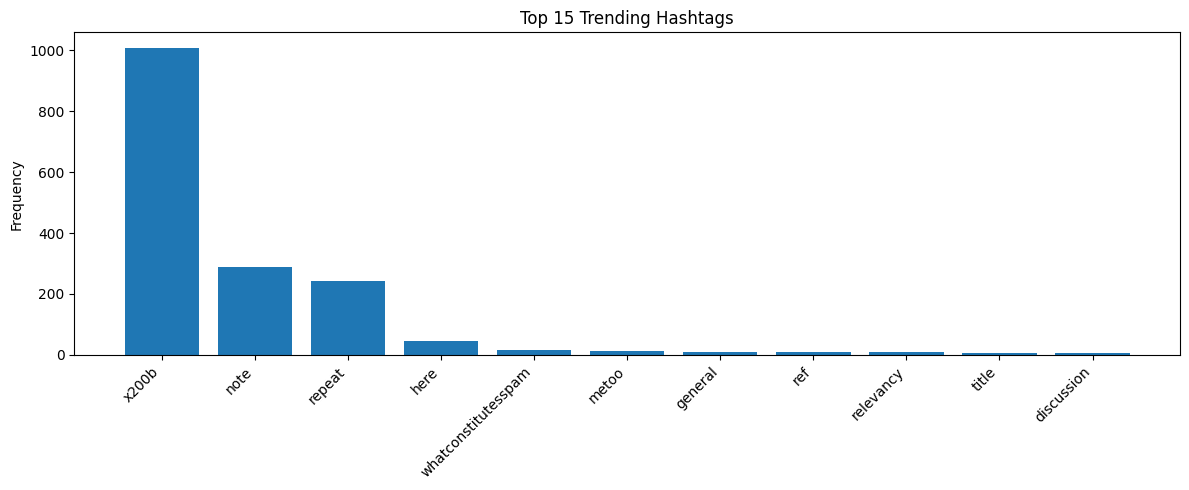

In [ ]:
import matplotlib.pyplot as plt

# Converting to DataFrame
df_hashtags = pd.DataFrame(meaningful_hashtags[:15], columns=["hashtag", "count"])

plt.figure(figsize=(12,5))
plt.bar(df_hashtags["hashtag"], df_hashtags["count"])
plt.title("Top 15 Trending Hashtags")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


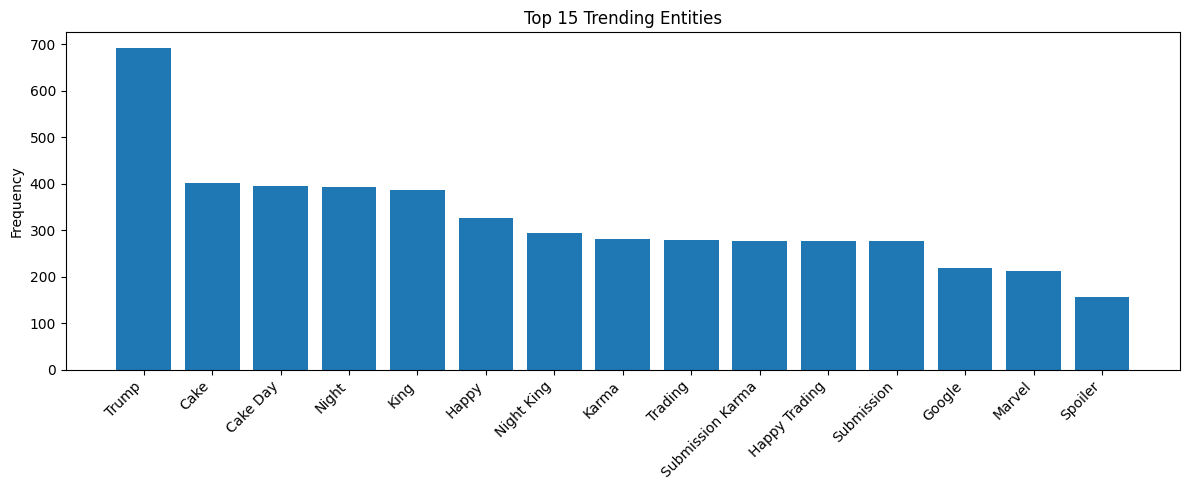

In [92]:
df_entities = pd.DataFrame(meaningful_entities[:15], columns=["entity", "count"])

plt.figure(figsize=(12,5))
plt.bar(df_entities["entity"], df_entities["count"])
plt.title("Top 15 Trending Entities")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


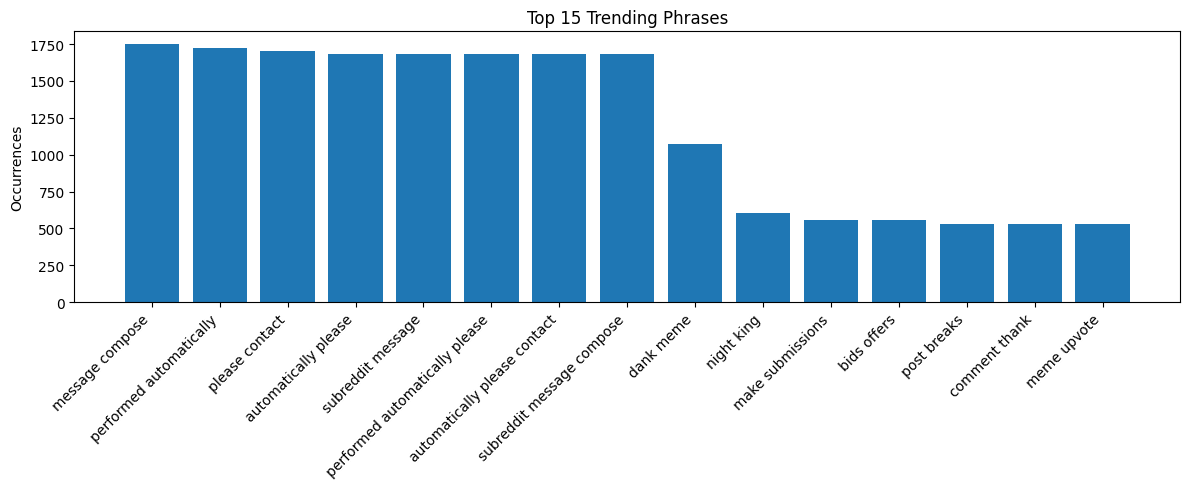

In [93]:
df_phrases = pd.DataFrame(meaningful_phrases[:15], columns=["phrase", "count"])

plt.figure(figsize=(12,5))
plt.bar(df_phrases["phrase"], df_phrases["count"])
plt.title("Top 15 Trending Phrases")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Occurrences")
plt.tight_layout()
plt.show()


In [94]:
print("\nBASIC STATISTICS:")
print(f"Total posts analyzed: {total_posts:,}")
print(f"Posts with hashtags: {posts_with_hashtags:,} ({posts_with_hashtags/total_posts*100:.1f}%)")
print(f"Posts with named entities: {posts_with_entities:,} ({posts_with_entities/total_posts*100:.1f}%)")


BASIC STATISTICS:
Total posts analyzed: 100,000
Posts with hashtags: 3,577 (3.6%)
Posts with named entities: 54,758 (54.8%)


In [100]:
print(f"\nCONCENTRATION METRICS:")
print(f"Hashtag Gini coefficient: {hashtag_gini:.3f} (0=even distribution, 1=concentrated)")
print(f"Entity Gini coefficient: {entity_gini:.3f}")
print(f"Top 10 hashtags account for: {top_10_hashtag_share:.1f}% of all hashtag mentions")
print(f"Top 10 entities account for: {top_10_entity_share:.1f}% of all entity mentions")


CONCENTRATION METRICS:
Hashtag Gini coefficient: 0.888 (0=even distribution, 1=concentrated)
Entity Gini coefficient: 0.560
Top 10 hashtags account for: 78.3% of all hashtag mentions
Top 10 entities account for: 6.8% of all entity mentions


In [ ]:
#  METRICS CALCULATION 
print("\n" + "="*60)
print("COMPREHENSIVE TREND METRICS")
print("="*60)

def calculate_all_metrics(hashtag_counter, entity_counter, phrase_counter, total_posts):
    """Calculate comprehensive trend metrics"""
    
    metrics = {}
    
    # BASIC VOLUME METRICS
    metrics['total_posts'] = total_posts
    metrics['total_hashtag_mentions'] = sum(hashtag_counter.values())
    metrics['total_entity_mentions'] = sum(entity_counter.values())
    metrics['total_phrase_occurrences'] = sum(phrase_counter.values())
    
    metrics['avg_hashtags_per_post'] = metrics['total_hashtag_mentions'] / total_posts if total_posts > 0 else 0
    metrics['avg_entities_per_post'] = metrics['total_entity_mentions'] / total_posts if total_posts > 0 else 0
    
    #  UNIQUENESS METRICS
    metrics['unique_hashtags'] = len(hashtag_counter)
    metrics['unique_entities'] = len(entity_counter)
    metrics['unique_phrases'] = len(phrase_counter)
    
    metrics['hashtag_diversity_index'] = metrics['unique_hashtags'] / metrics['total_hashtag_mentions'] if metrics['total_hashtag_mentions'] > 0 else 0
    metrics['entity_diversity_index'] = metrics['unique_entities'] / metrics['total_entity_mentions'] if metrics['total_entity_mentions'] > 0 else 0
    
    #  CONCENTRATION METRICS
    def calculate_herfindahl_index(counter):
        """Calculate Herfindahl-Hirschman Index (HHI) for market concentration"""
        if not counter:
            return 0
        
        total = sum(counter.values())
        if total == 0:
            return 0
        
        hhi = sum((count/total)**2 for count in counter.values())
        return hhi * 10000  
    
    metrics['hashtag_hhi'] = calculate_herfindahl_index(hashtag_counter)
    metrics['entity_hhi'] = calculate_herfindahl_index(entity_counter)
    
 
    
    #  TOP-N SHARE METRICS
    def calculate_top_n_share(counter, n):
        total = sum(counter.values())
        if total == 0:
            return 0
        top_n_sum = sum(count for _, count in counter.most_common(n))
        return top_n_sum / total * 100
    
    metrics['top_5_hashtag_share'] = calculate_top_n_share(hashtag_counter, 5)
    metrics['top_10_hashtag_share'] = calculate_top_n_share(hashtag_counter, 10)
    metrics['top_20_hashtag_share'] = calculate_top_n_share(hashtag_counter, 20)
    
    metrics['top_5_entity_share'] = calculate_top_n_share(entity_counter, 5)
    metrics['top_10_entity_share'] = calculate_top_n_share(entity_counter, 10)
    metrics['top_20_entity_share'] = calculate_top_n_share(entity_counter, 20)
    
    # REND LONGEVITY/VIRALITY METRICS
    def calculate_pareto_ratio(counter):
        """Calculate what % of items account for 80% of mentions"""
        if not counter:
            return 0
        
        total = sum(counter.values())
        target = total * 0.8
        cumulative = 0
        count_items = 0
        
        for _, count in counter.most_common():
            cumulative += count
            count_items += 1
            if cumulative >= target:
                break
        
        return count_items / len(counter) * 100 if len(counter) > 0 else 0
    
    metrics['hashtag_pareto_ratio'] = calculate_pareto_ratio(hashtag_counter)
    metrics['entity_pareto_ratio'] = calculate_pareto_ratio(entity_counter)
    
    # ENGAGEMENT/VIRALITY SCORE
    def calculate_virality_score(counter):
        """Score based on how concentrated vs distributed trends are"""
        if len(counter) < 2:
            return 0
        
        counts = list(counter.values())
        mean_count = np.mean(counts)
        std_count = np.std(counts)
        
        # Coefficient of variation
        cv = std_count / mean_count if mean_count > 0 else 0
        
        
        score = min(100, cv * 20)  # Scale CV to 0-100 range
        
        return score
    
    metrics['hashtag_virality_score'] = calculate_virality_score(hashtag_counter)
    metrics['entity_virality_score'] = calculate_virality_score(entity_counter)
    
    #  TREND CATEGORY DISTRIBUTION
    def calculate_category_distribution(entities, entity_counter):
        """Calculate distribution across categories"""
        categories = defaultdict(float)
        
        for entity, count in entity_counter.items():
            category = categorize_trend(entity)
            categories[category] += count
        
        total = sum(categories.values())
        if total > 0:
            for category in categories:
                categories[category] = categories[category] / total * 100
        
        return dict(categories)
    
    
    if entity_counter:
        category_dist = calculate_category_distribution(meaningful_entities, entity_counter)
        metrics.update({f'category_{cat.lower()}_percent': val for cat, val in category_dist.items()})
    
    return metrics

# Calculating all metrics
all_metrics = calculate_all_metrics(hashtag_counter, entity_counter, phrase_counter, total_posts)

# Display metrics in organized sections
print("\n VOLUME METRICS:")
print("-" * 50)
print(f"Total posts analyzed: {all_metrics['total_posts']:,}")
print(f"Total hashtag mentions: {all_metrics['total_hashtag_mentions']:,}")
print(f"Total entity mentions: {all_metrics['total_entity_mentions']:,}")
print(f"Average hashtags per post: {all_metrics['avg_hashtags_per_post']:.2f}")
print(f"Average entities per post: {all_metrics['avg_entities_per_post']:.2f}")

print("\n UNIQUENESS METRICS:")
print("-" * 50)
print(f"Unique hashtags: {all_metrics['unique_hashtags']:,}")
print(f"Unique entities: {all_metrics['unique_entities']:,}")
print(f"Unique phrases: {all_metrics['unique_phrases']:,}")
print(f"Hashtag diversity index: {all_metrics['hashtag_diversity_index']:.3f}")
print(f"Entity diversity index: {all_metrics['entity_diversity_index']:.3f}")

print("\n CONCENTRATION METRICS:")
print("-" * 50)
print(f"Hashtag HHI: {all_metrics['hashtag_hhi']:.0f}")
print(f"Entity HHI: {all_metrics['entity_hhi']:.0f}")

# HHI Interpretation
hhi_interpretation = {
    'Competitive': (0, 1500),
    'Moderately Concentrated': (1500, 2500),
    'Highly Concentrated': (2500, 10000)
}

print("\nHHI Interpretation (0-10000 scale):")
for category, (low, high) in hhi_interpretation.items():
    print(f"  {category}: {low}-{high}")

print("\n TOP-N DOMINANCE:")
print("-" * 50)
print(f"Top 5 hashtags share: {all_metrics['top_5_hashtag_share']:.1f}%")
print(f"Top 10 hashtags share: {all_metrics['top_10_hashtag_share']:.1f}%")
print(f"Top 20 hashtags share: {all_metrics['top_20_hashtag_share']:.1f}%")
print(f"Top 5 entities share: {all_metrics['top_5_entity_share']:.1f}%")
print(f"Top 10 entities share: {all_metrics['top_10_entity_share']:.1f}%")
print(f"Top 20 entities share: {all_metrics['top_20_entity_share']:.1f}%")

print("\n VIRALITY METRICS:")
print("-" * 50)
print(f"Hashtag Pareto ratio: {all_metrics['hashtag_pareto_ratio']:.1f}% of hashtags account for 80% of mentions")
print(f"Entity Pareto ratio: {all_metrics['entity_pareto_ratio']:.1f}% of entities account for 80% of mentions")
print(f"Hashtag virality score: {all_metrics['hashtag_virality_score']:.1f}/100")
print(f"Entity virality score: {all_metrics['entity_virality_score']:.1f}/100")

# Interpret virality scores
print("\nVirality Score Interpretation:")
print("  0-20: Low virality (trends are evenly distributed)")
print("  20-50: Moderate virality")
print("  50-80: High virality (some trends dominating)")
print("  80-100: Viral (few trends dominating conversation)")

# Display category distribution if available
if any(k.startswith('category_') for k in all_metrics.keys()):
    print("\n CATEGORY DISTRIBUTION:")
    print("-" * 50)
    
    category_metrics = {k: v for k, v in all_metrics.items() if k.startswith('category_')}
    for cat_metric, value in sorted(category_metrics.items(), key=lambda x: x[1], reverse=True):
        category_name = cat_metric.replace('category_', '').replace('_percent', '').title()
        print(f"{category_name}: {value:.1f}%")

# Calculate trend health score
def calculate_trend_health_score(metrics):
    """Calculate overall trend health score (0-100)"""
    scores = []
    
    #  Diversity score (higher unique trends = better)
    diversity_score = min(100, (metrics['unique_hashtags'] / 100) * 10 + 
                         (metrics['unique_entities'] / 500) * 10)
    scores.append(min(100, diversity_score))
    
    #  Concentration score 
    
    hhi_score = 100 - abs(metrics['hashtag_hhi'] - 1500) / 15
    scores.append(max(0, min(100, hhi_score)))
    
    #  Top share score (not too concentrated)
    top_share_score = 100 - metrics['top_10_hashtag_share']
    scores.append(max(0, min(100, top_share_score)))
    
    # Virality score (moderate virality = good)
    virality_score = 100 - abs(metrics['hashtag_virality_score'] - 50) * 2
    scores.append(max(0, min(100, virality_score)))
    
    # Average the scores
    health_score = np.mean(scores)
    
    return health_score

trend_health_score = calculate_trend_health_score(all_metrics)

print("\n" + "="*60)
print("OVERALL TREND HEALTH SCORE")
print("="*60)
print(f"\n Trend Health Score: {trend_health_score:.1f}/100")

# Interpret health score
if trend_health_score >= 80:
    print(" EXCELLENT: Trends are diverse, engaging, and sustainable")
elif trend_health_score >= 60:
    print(" GOOD: Healthy trend ecosystem with good diversity")
elif trend_health_score >= 40:
    print(" FAIR: Some concentration issues, could be more diverse")
else:
    print(" POOR: Trends are too concentrated or not engaging")

print("\nRecommendations:")
if all_metrics['top_10_hashtag_share'] > 70:
    print("  - Top trends are dominating too much (consider promoting diversity)")
if all_metrics['unique_hashtags'] < 50:
    print("  - Low hashtag diversity (encourage more varied hashtag use)")
if all_metrics['avg_hashtags_per_post'] < 0.5:
    print("  - Low hashtag engagement (users aren't using many hashtags)")
if trend_health_score < 40:
    print("  - Consider implementing trend diversification strategies")

print("\n" + "="*60)

# Saving comprehensive metrics
metrics_df = pd.DataFrame([all_metrics])
metrics_df.to_csv('../dataset/comprehensive_trend_metrics.csv', index=False)
print(f"\n All metrics saved to: ../dataset/comprehensive_trend_metrics.csv")

# Generate metrics visualization suggestion
print("\n RECOMMENDED VISUALIZATIONS:")
print("1. Hashtag concentration curve (Lorenz curve)")
print("2. Top 10 trends bar chart")
print("3. Category distribution pie chart")
print("4. Trend health score dashboard")


COMPREHENSIVE TREND METRICS

 VOLUME METRICS:
--------------------------------------------------
Total posts analyzed: 100,000
Total hashtag mentions: 3,577
Total entity mentions: 54,758
Average hashtags per post: 0.04
Average entities per post: 0.55

 UNIQUENESS METRICS:
--------------------------------------------------
Unique hashtags: 268
Unique entities: 21,528
Unique phrases: 399,066
Hashtag diversity index: 0.075
Entity diversity index: 0.393

 CONCENTRATION METRICS:
--------------------------------------------------
Hashtag HHI: 1457
Entity HHI: 9

HHI Interpretation (0-10000 scale):
  Competitive: 0-1500
  Moderately Concentrated: 1500-2500
  Highly Concentrated: 2500-10000

 TOP-N DOMINANCE:
--------------------------------------------------
Top 5 hashtags share: 69.8%
Top 10 hashtags share: 78.3%
Top 20 hashtags share: 86.7%
Top 5 entities share: 4.1%
Top 10 entities share: 6.8%
Top 20 entities share: 10.2%

 VIRALITY METRICS:
-----------------------------------------------

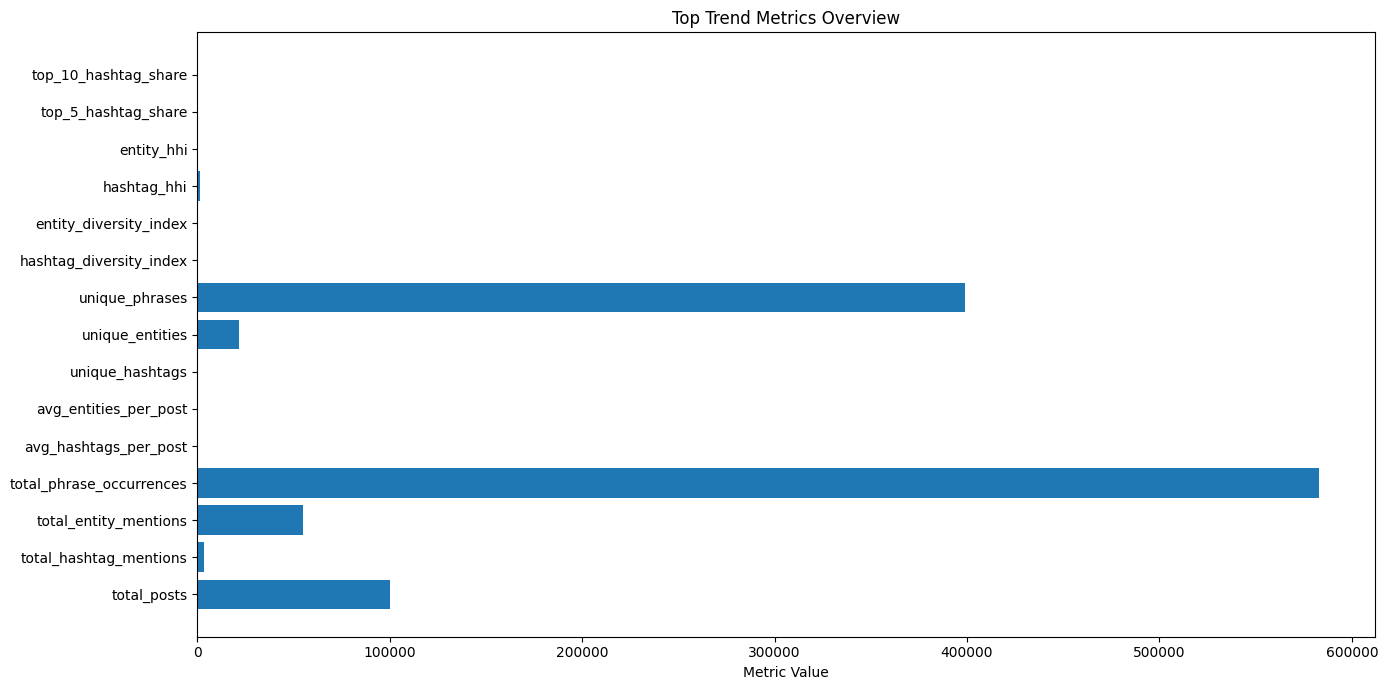

In [ ]:
import matplotlib.pyplot as plt

# Converting metrics dictionary to lists for plotting
metric_names = list(all_metrics.keys())
metric_values = list(all_metrics.values())

# Removing non-numeric metrics (like categories, strings)
numeric_names = []
numeric_values = []

for name, val in zip(metric_names, metric_values):
    if isinstance(val, (int, float)):
        numeric_names.append(name)
        numeric_values.append(val)

# Plotting the top 15 most important metrics
plt.figure(figsize=(14, 7))
plt.barh(numeric_names[:15], numeric_values[:15])
plt.xlabel("Metric Value")
plt.title("Top Trend Metrics Overview")
plt.tight_layout()
plt.show()
